K


In [1]:
## Importing Libraries

import plotly.express as px
import plotly.offline as pyo
import numpy as np
import pandas as pd 
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
train = pd.read_csv('train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
store = pd.read_csv('store.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Summary
#### Train
- Sales: the turnover for any given day (target variable).
- Customers: the number of customers on a given day.
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.
- Promo: indicates whether a store is running a promo on that day.
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

#### Store
- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#### Missing Values

In [5]:
train.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no mising values present in train df.

In [6]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

But in store df, missing values arev present in CompetitionOpenSinceMonth, CompetitionOpenSinceYear,  Promo2SinceWeek, Promo2SinceYear, PromoInterval. Will handle these values in Feature Engineering

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Outliers are present in both of the dataframes.

In [11]:
for feature in train.columns:
    print(feature,' has ',len(train[feature].unique()),' unique values' )

Store  has  1115  unique values
DayOfWeek  has  7  unique values
Sales  has  21734  unique values
Customers  has  4086  unique values
Open  has  2  unique values
Promo  has  2  unique values
StateHoliday  has  4  unique values
SchoolHoliday  has  2  unique values


In [12]:
for feature in store.columns:
    print(feature,' has ',len(store[feature].unique()),' unique values' )

Store  has  1115  unique values
StoreType  has  4  unique values
Assortment  has  3  unique values
CompetitionDistance  has  655  unique values
CompetitionOpenSinceMonth  has  13  unique values
CompetitionOpenSinceYear  has  24  unique values
Promo2  has  2  unique values
Promo2SinceWeek  has  25  unique values
Promo2SinceYear  has  8  unique values
PromoInterval  has  4  unique values


In [13]:
train.shape

(1017209, 8)

In [14]:
store.shape

(1115, 10)

As we are dealing with time-series data, it will probably serve us to extract dates for further analysis.

In [15]:
train['year'] = train.index.year
train['month'] = train.index.month
train['Day'] = train.index.day
train['DayOfWeek'] = train.index.dayofweek

In [16]:
train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,4,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,4,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,4,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,4,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,1,0,0,0,0,a,1,2013,1,1
2013-01-01,1112,1,0,0,0,0,a,1,2013,1,1
2013-01-01,1113,1,0,0,0,0,a,1,2013,1,1


## Pre-processing

### Train DataFrame:
Let's perform EDA on train df.

In [17]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'Day'],
      dtype='object')

In [18]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,4,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,4,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,4,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,4,4822,559,1,1,0,1,2015,7,31


In [19]:
train.Open.unique()

array([1, 0], dtype=int64)

There are 2 unique values of Open feature. 0: when store is closed, 1: when store is opened.
let's visualize this.

In [20]:
Open_train = train[train['Open']==1]
Close_train = train[train['Open']==0]

In [21]:
print('Total = ', len(train))
print('Number of shops/days OPEN = ', len(Open_train))
print('Number of shops/days CLOSED = ', len(Close_train))

Total =  1017209
Number of shops/days OPEN =  844392
Number of shops/days CLOSED =  172817


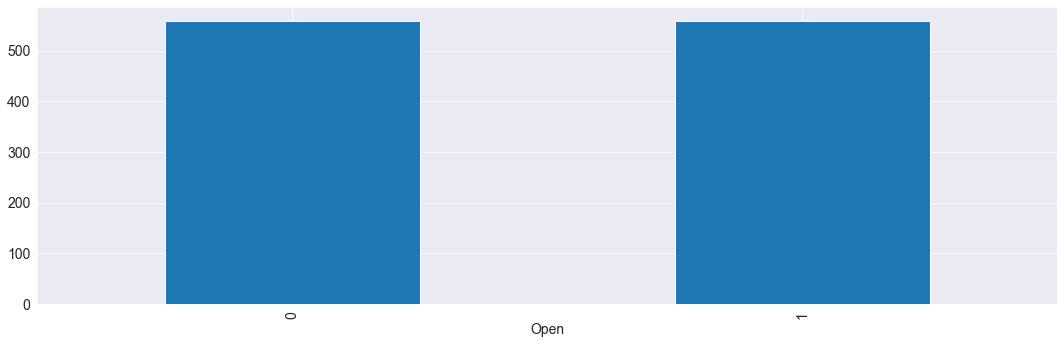

In [22]:
train['Store'].groupby(train['Open']).mean().plot(kind='bar', figsize=(15,5))
plt.tight_layout()

Text(0.5, 1.0, 'Average SALES per MONTH')

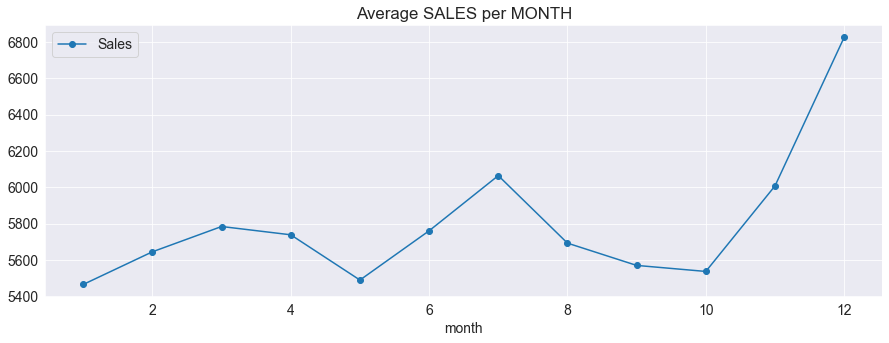

In [23]:
axis = train.groupby('month')[['Sales']].mean().plot( marker = 'o')
axis.set_title('Average SALES per MONTH')

<AxesSubplot:xlabel='month'>

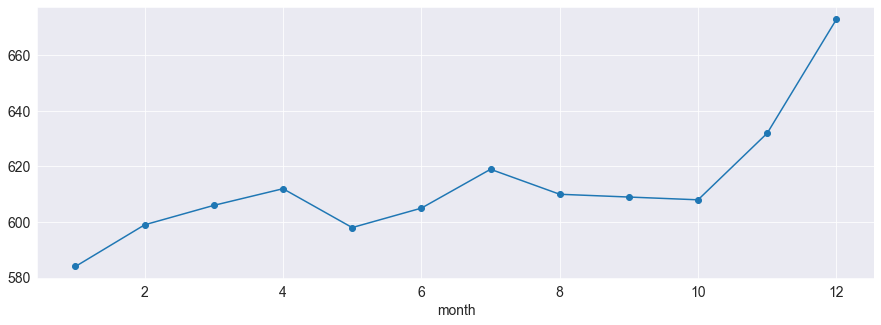

In [24]:
train.groupby('month')['Customers'].median().plot(figsize=(15,5), marker='o')

Sales is increasing from November to december. Sales and customers are positively correlated.

Text(0.5, 1.0, 'Average SALES per DayOfWeek')

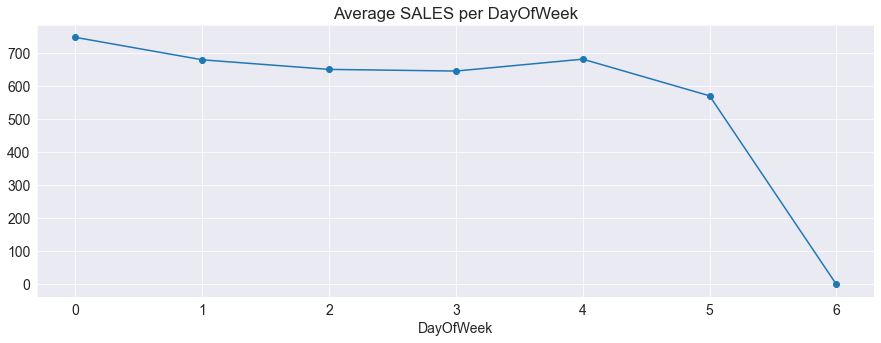

In [25]:
train.groupby('DayOfWeek')['Customers'].median().plot( figsize=(15,5), marker = 'o')
plt.title('Average SALES per DayOfWeek')

On Sunday the most customer visists the store.

<AxesSubplot:ylabel='Frequency'>

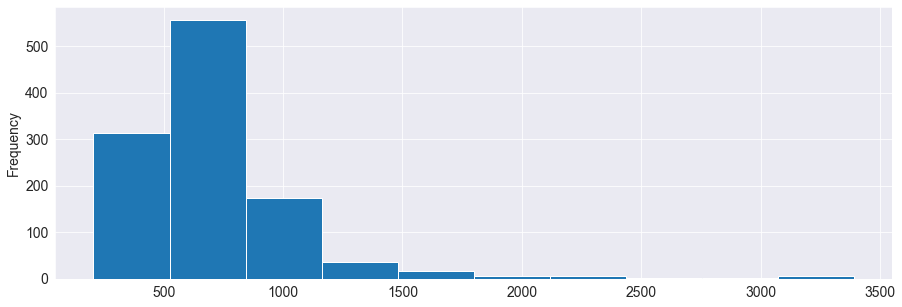

In [26]:
train.groupby('Store')['Customers'].median().plot(kind = 'hist',figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

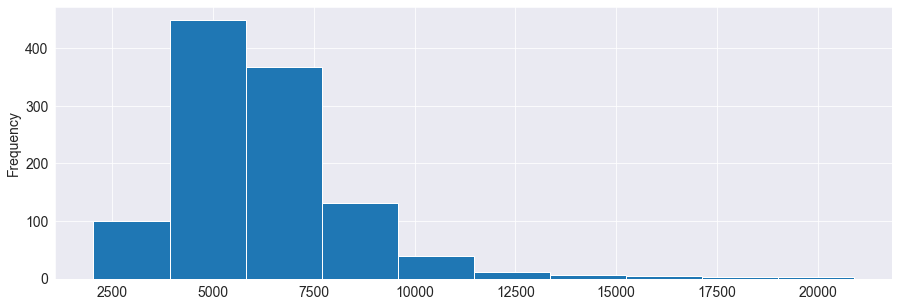

In [27]:
train.groupby('Store')['Sales'].median().plot(kind = 'hist',figsize=(15,5))

There is a seasonal trend in sales. More customers visits the store from january to july.

<AxesSubplot:xlabel='StateHoliday'>

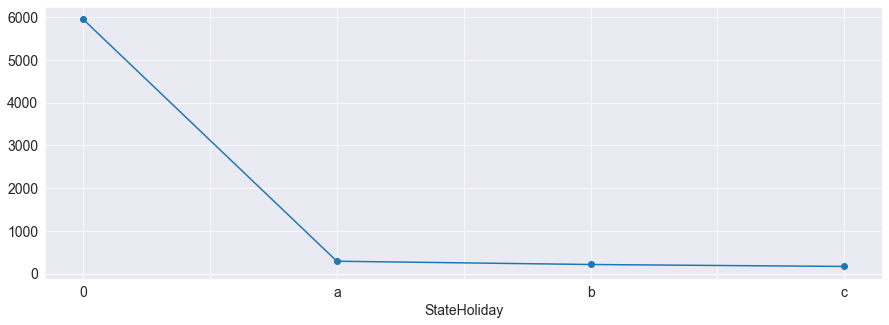

In [28]:
train.groupby('StateHoliday')['Sales'].mean().plot(figsize=(15,5), marker='o')

<AxesSubplot:xlabel='DayOfWeek'>

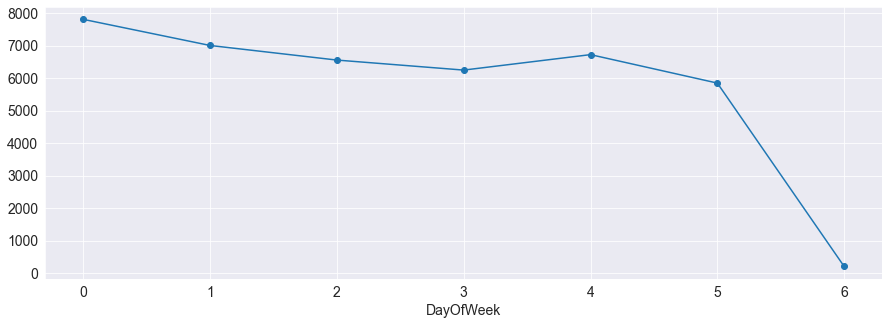

In [29]:
train.groupby('DayOfWeek')['Sales'].mean().plot(figsize=(15,5), marker='o')

<AxesSubplot:xlabel='month', ylabel='Sales'>

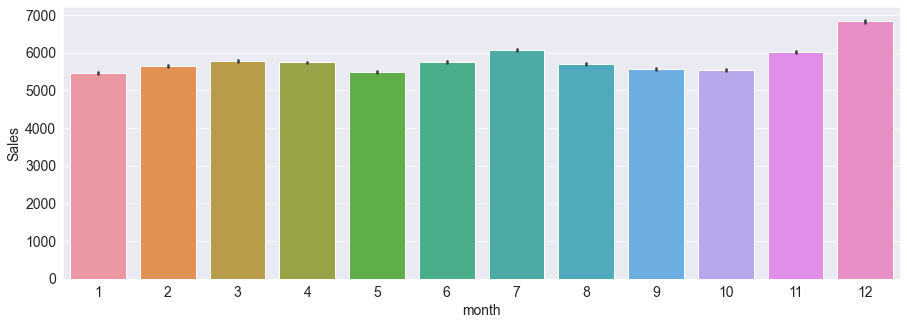

In [30]:
sns.barplot(x='month', y='Sales', data = train)

<AxesSubplot:xlabel='Day'>

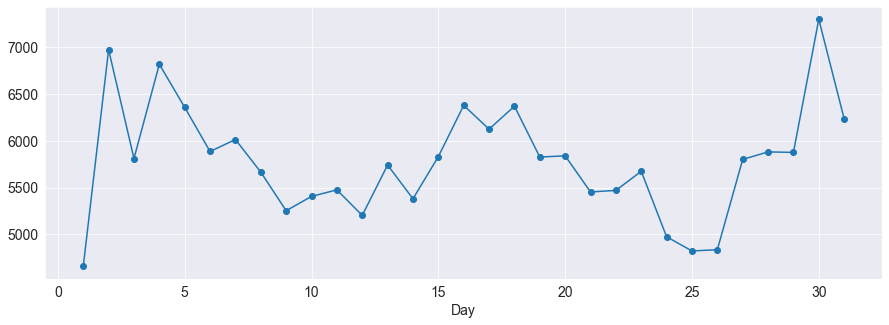

In [31]:
train.groupby('Day')['Sales'].mean().plot(marker='o')

<AxesSubplot:xlabel='Day', ylabel='Sales'>

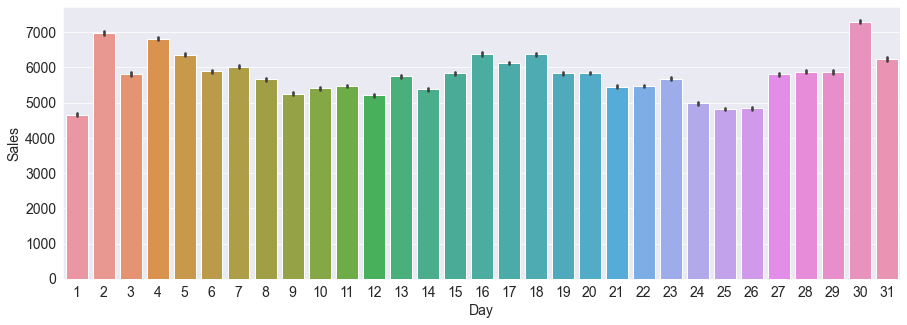

In [32]:
sns.barplot(x='Day', y='Sales', data = train)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

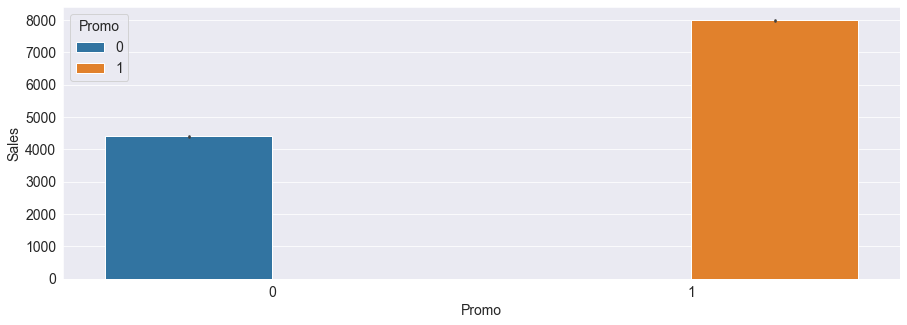

In [33]:
sns.barplot(data=train, x='Promo', y='Sales', hue='Promo')

#### Let's explore on Open feature

<AxesSubplot:xlabel='Open', ylabel='Sales'>

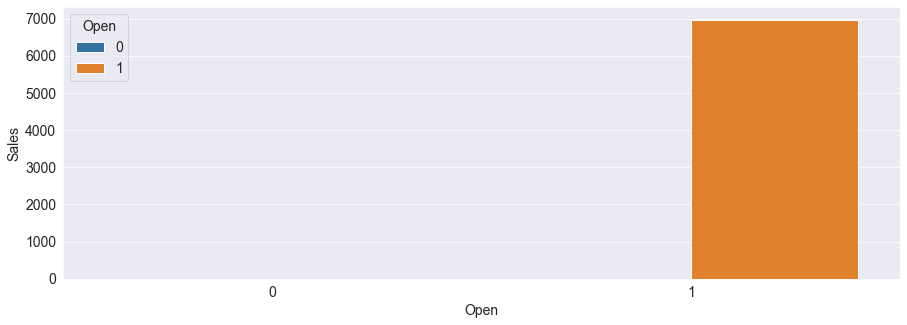

In [34]:
sns.barplot(data=train, x='Open', y='Sales', hue='Open')

##### When store is not open and sales is 0.

In [35]:
train[(train.Open!=0) & (train.Sales!=0)]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,4,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,4,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,4,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,4,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,682,1,3375,566,1,0,a,1,2013,1,1
2013-01-01,733,1,10765,2377,1,0,a,1,2013,1,1
2013-01-01,769,1,5035,1248,1,0,a,1,2013,1,1


##### When store is open and sales is 0.

In [36]:
train[(train.Open==0) & (train.Sales==0)]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,292,4,0,0,0,1,0,1,2015,7,31
2015-07-31,876,4,0,0,0,1,0,1,2015,7,31
2015-07-30,292,3,0,0,0,1,0,1,2015,7,30
2015-07-30,876,3,0,0,0,1,0,1,2015,7,30
2015-07-29,292,2,0,0,0,1,0,1,2015,7,29
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,1,0,0,0,0,a,1,2013,1,1
2013-01-01,1112,1,0,0,0,0,a,1,2013,1,1
2013-01-01,1113,1,0,0,0,0,a,1,2013,1,1


There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts we will drop these values.

Let's check about open store with 0 sales

In [37]:
zero_sales = train[(train.Open !=0) & (train.Sales==0)]
zero_sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-05-15,971,4,0,0,1,0,0,1,2015,5,15
2015-03-26,674,3,0,0,1,0,0,0,2015,3,26
2015-02-05,699,3,0,0,1,1,0,0,2015,2,5
2014-10-01,708,2,0,0,1,1,0,0,2014,10,1
2014-09-22,357,0,0,0,1,0,0,0,2014,9,22


54 records are peresent in which store is open but sale is 0. So, we are not going to use these records in our forecast

In [38]:
train = train[(train.Open!=0) & (train.Sales!=0)]

In [39]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,4,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,4,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,4,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,4,4822,559,1,1,0,1,2015,7,31


## Store Dataframe

In [40]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [41]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


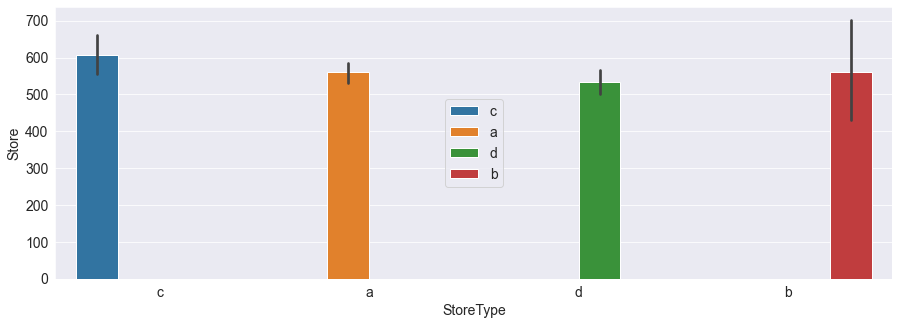

In [42]:
sns.barplot(data=store, y='Store', x='StoreType', hue='StoreType')
plt.legend(loc='center')

c storeType has highest number of stores.

<AxesSubplot:xlabel='Assortment', ylabel='Store'>

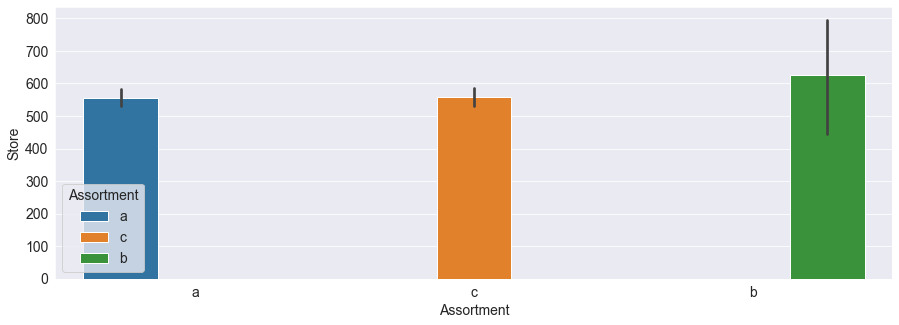

In [43]:
sns.barplot(data=store, y='Store', x='Assortment', hue='Assortment')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Count'>

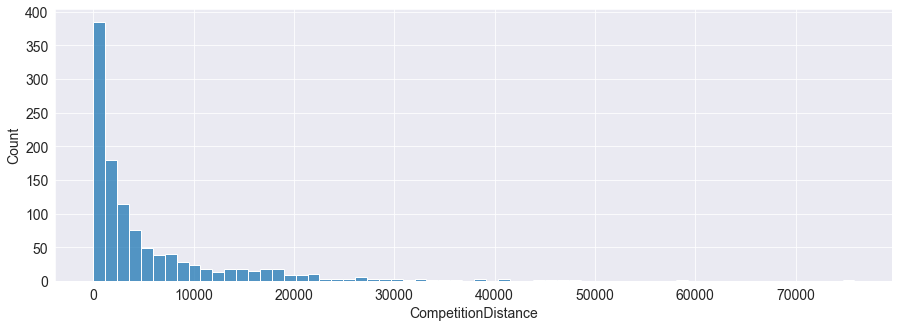

In [44]:
sns.histplot(data=store, x='CompetitionDistance')

The distribution is right skewed.

In [45]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [46]:
store.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

<AxesSubplot:xlabel='CompetitionOpenSinceYear'>

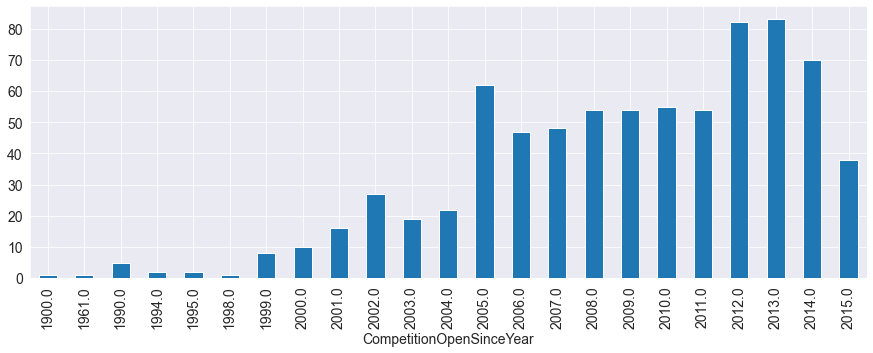

In [47]:
store.groupby('CompetitionOpenSinceYear')['CompetitionOpenSinceYear'].size().plot(kind='bar')

Maximum competitions open in 2013.

<AxesSubplot:xlabel='Promo2'>

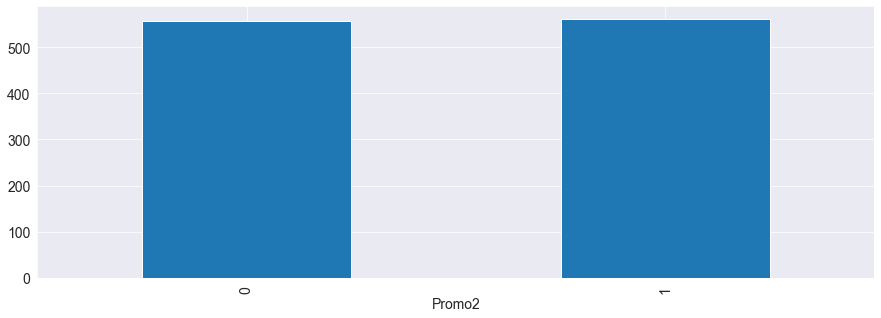

In [48]:
store.groupby('Promo2')['Store'].mean().plot(kind='bar')

<AxesSubplot:xlabel='CompetitionOpenSinceMonth,CompetitionOpenSinceYear'>

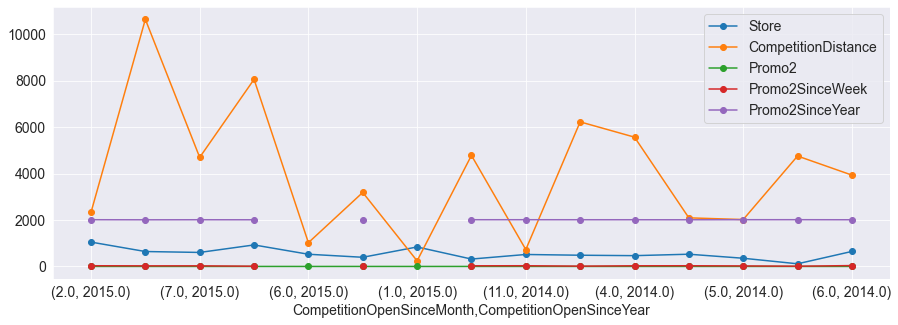

In [49]:
store.groupby(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']).mean().sort_values(by='CompetitionOpenSinceYear',ascending=False)[:15].plot(marker='o')

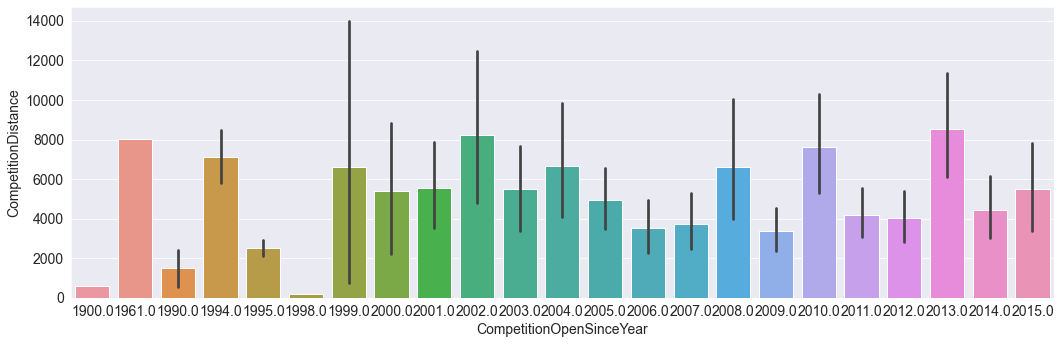

In [50]:
sns.barplot(data=store, x='CompetitionOpenSinceYear', y='CompetitionDistance')
plt.tight_layout()

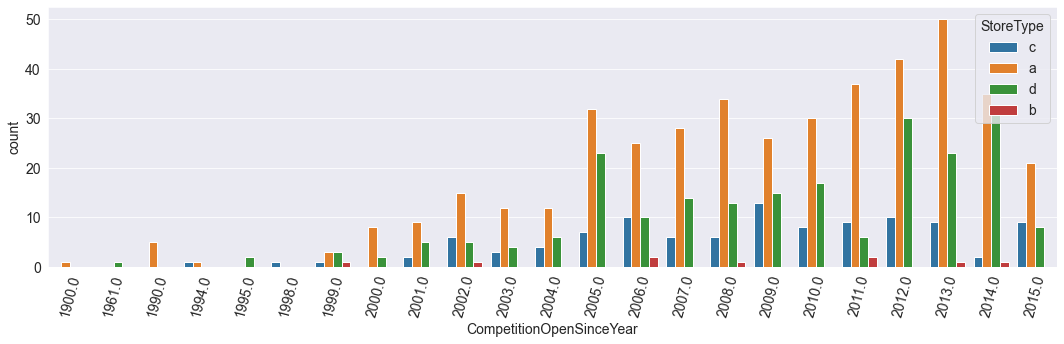

In [51]:
plt.xticks(rotation=75)
sns.countplot(data=store, x='CompetitionOpenSinceYear', hue='StoreType')
plt.tight_layout()

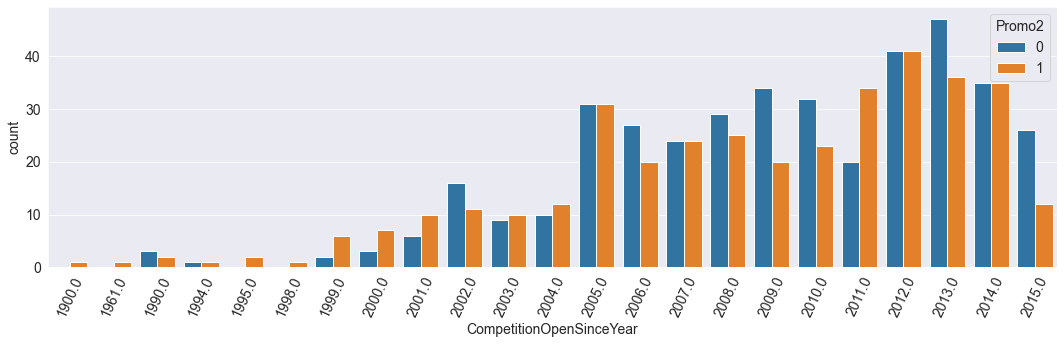

In [52]:
plt.xticks(rotation=65)
sns.countplot(data=store, x='CompetitionOpenSinceYear', hue='Promo2')
plt.tight_layout()

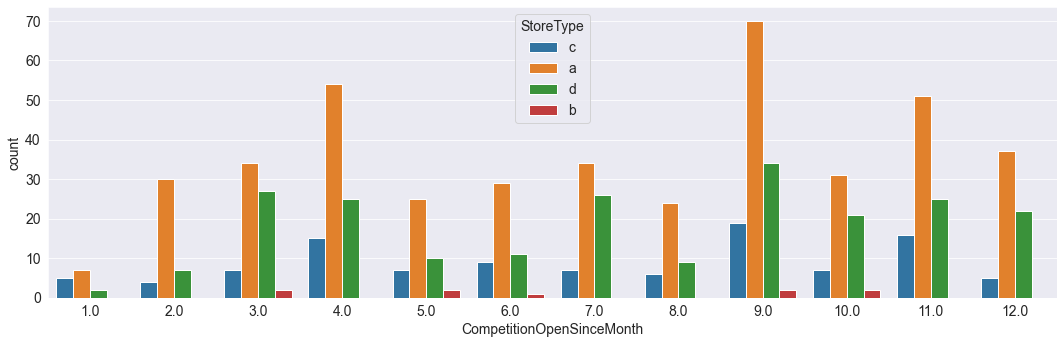

In [53]:
sns.countplot(data=store, x='CompetitionOpenSinceMonth', hue='StoreType')
plt.tight_layout()

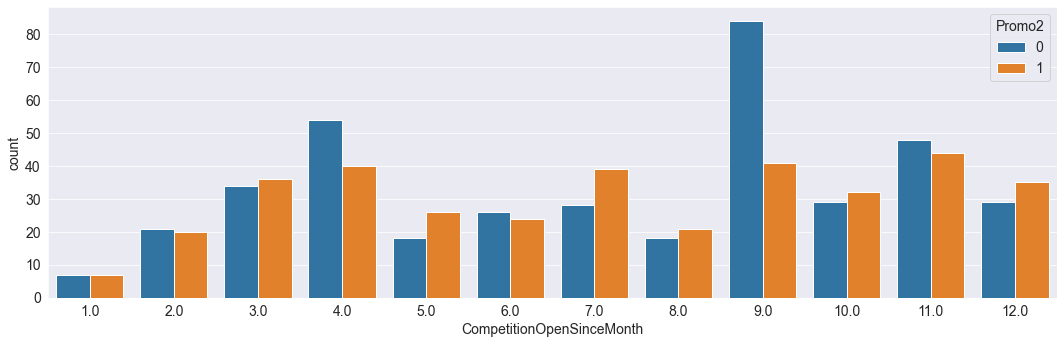

In [54]:
sns.countplot(data=store, x='CompetitionOpenSinceMonth', hue='Promo2')
plt.tight_layout()

In [55]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


<AxesSubplot:xlabel='StoreType', ylabel='Store'>

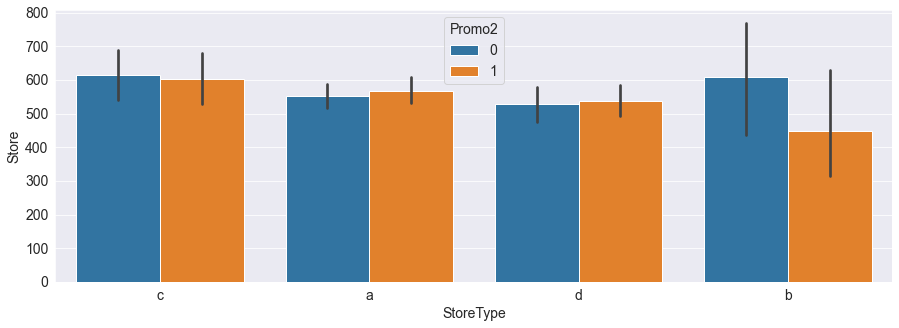

In [56]:
sns.barplot(data= store, x='StoreType', y='Store', hue='Promo2')

<AxesSubplot:xlabel='StoreType,Promo2SinceYear'>

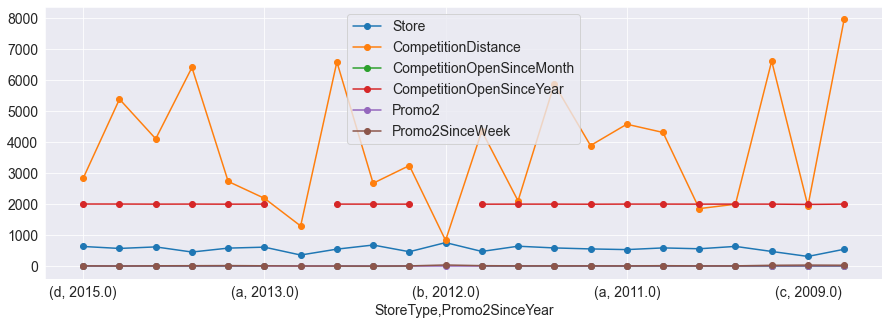

In [57]:
store.groupby(['StoreType','Promo2SinceYear']).mean().sort_values(by='Promo2SinceYear', ascending=False).plot(marker='o')

<AxesSubplot:xlabel='PromoInterval', ylabel='count'>

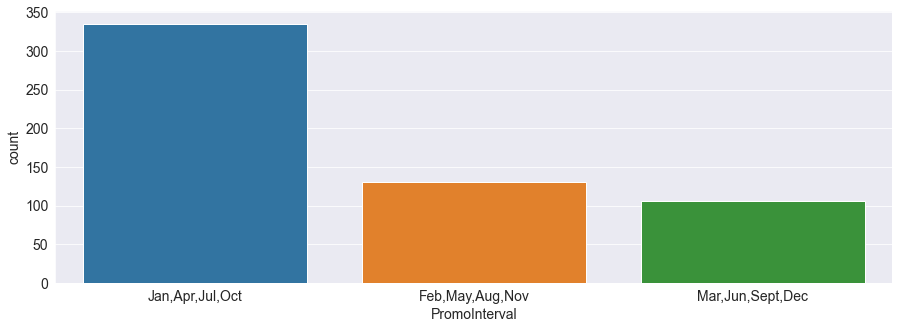

In [58]:
sns.countplot(data= store, x= 'PromoInterval')

### Merging the train df with store df

In [59]:
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=844338, freq=None)

In [60]:
df = pd.merge(train, store, on = 'Store', how='inner')

In [61]:
df.shape

(844338, 20)

In [62]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,3,5020,546,1,1,0,1,2015,7,30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,2,4782,523,1,1,0,1,2015,7,29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,1,5011,560,1,1,0,1,2015,7,28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,0,6102,612,1,1,0,1,2015,7,27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


From the above features some of the features are not required like store because every store has unique id

In [63]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in features_with_nan:
    print(feature," has ", np.round(df[feature].isnull().mean()*100,4),"% of missing values")

CompetitionOpenSinceMonth  has  31.8119 % of missing values
CompetitionOpenSinceYear  has  31.8119 % of missing values
Promo2SinceWeek  has  50.133 % of missing values
Promo2SinceYear  has  50.133 % of missing values
PromoInterval  has  50.133 % of missing values


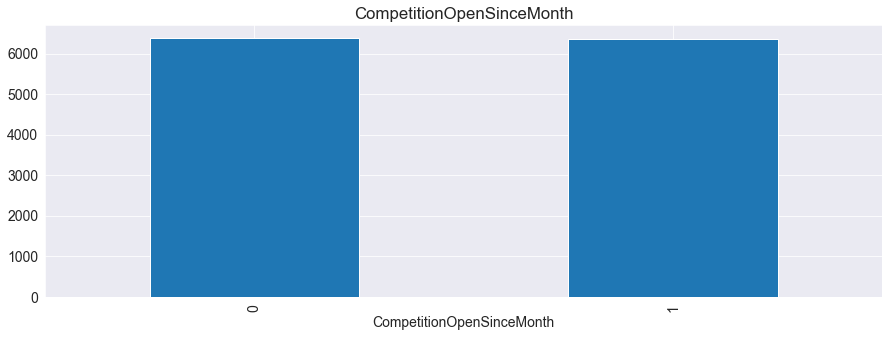

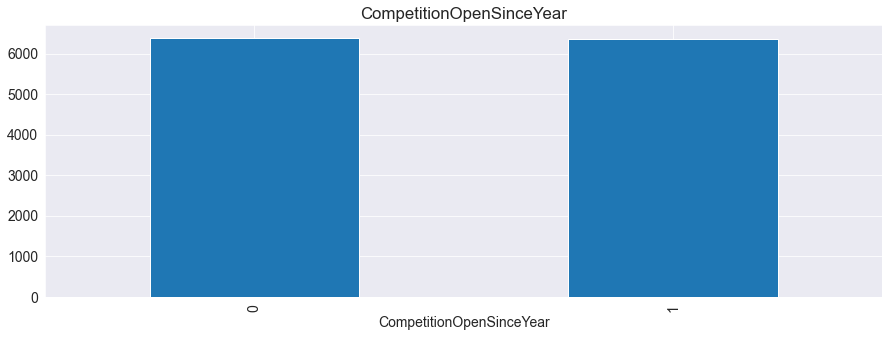

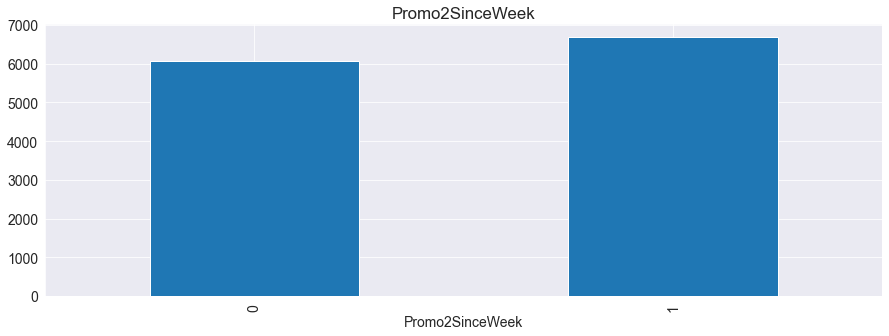

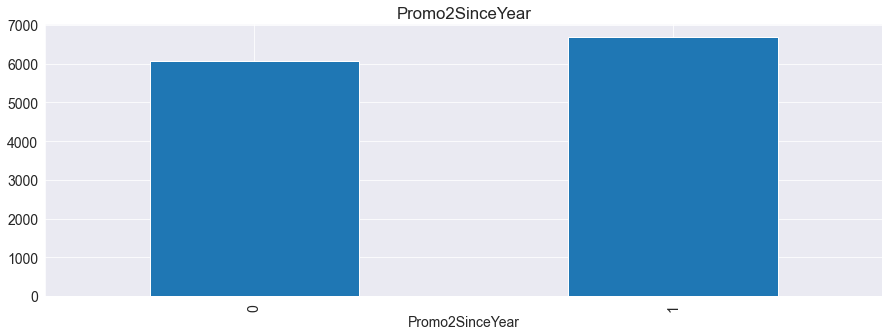

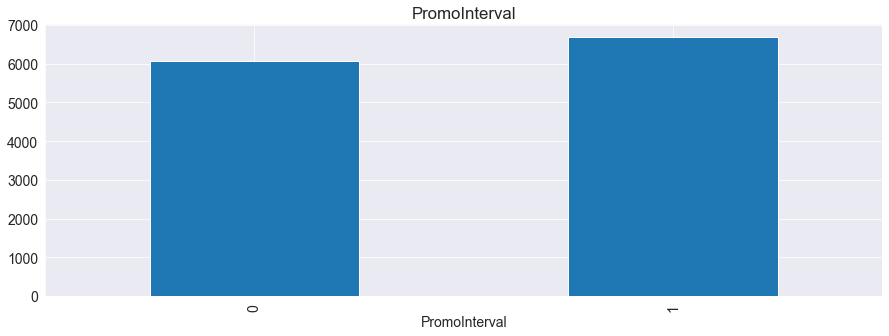

In [64]:
for feature in features_with_nan:
    data = df.copy()
    data[feature]= np.where(data[feature].isnull(),1,0)
#     plt.xticks(rotation=75)
    data.groupby(feature)['Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [65]:
print("Id of Stoores {}".format(len(df.Store)))

Id of Stoores 844338


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Sales                      844338 non-null  int64  
 3   Customers                  844338 non-null  int64  
 4   Open                       844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   year                       844338 non-null  int64  
 9   month                      844338 non-null  int64  
 10  Day                        844338 non-null  int64  
 11  StoreType                  844338 non-null  object 
 12  Assortment                 844338 non-null  object 
 13  CompetitionDistance        84

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

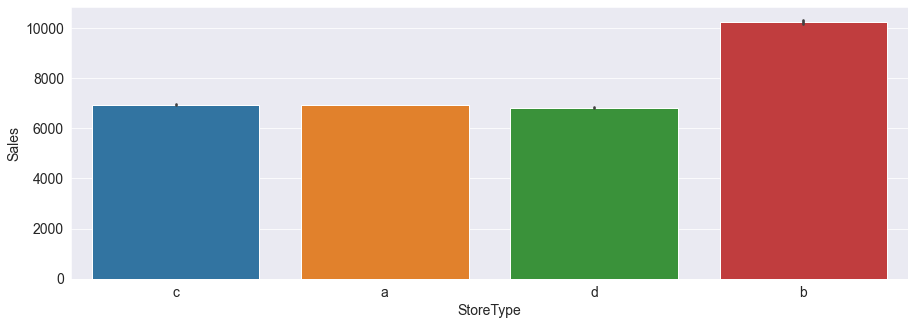

In [67]:
sns.barplot(x='StoreType', y='Sales', data=df)
## averafe

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

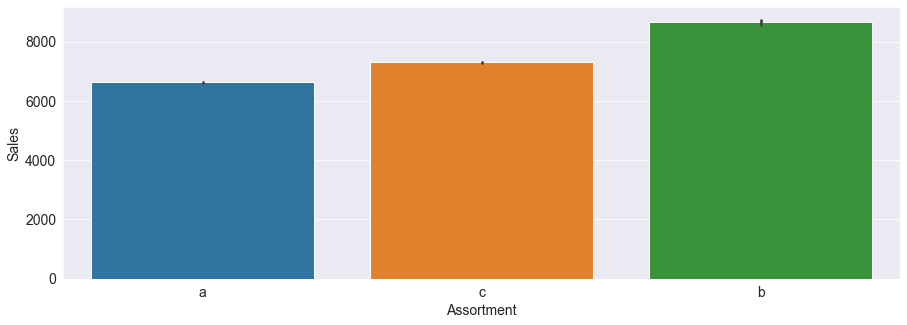

In [68]:
sns.barplot(x='Assortment', y='Sales', data=df)

In [69]:
df.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [70]:
df.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [71]:
df.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

### Target Variable

In [72]:
df.Sales.unique()

array([ 5263,  5020,  4782, ..., 18188, 23584, 29161], dtype=int64)

In [73]:
df.Sales.isnull().sum()

0

<AxesSubplot:xlabel='Sales', ylabel='Count'>

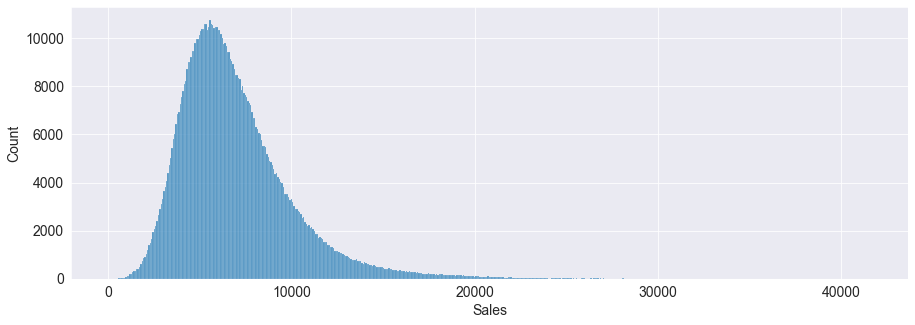

In [74]:
sns.histplot(data=df, x='Sales')

### Numerical Features

In [75]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']

In [76]:
numerical_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'year',
 'month',
 'Day',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [77]:
df[numerical_features].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,Day,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,4,5263,555,1,1,1,2015,7,31,1270.0,9.0,2008.0,0,NaN,NaN
1,1,3,5020,546,1,1,1,2015,7,30,1270.0,9.0,2008.0,0,NaN,NaN
2,1,2,4782,523,1,1,1,2015,7,29,1270.0,9.0,2008.0,0,NaN,NaN
3,1,1,5011,560,1,1,1,2015,7,28,1270.0,9.0,2008.0,0,NaN,NaN
4,1,0,6102,612,1,1,1,2015,7,27,1270.0,9.0,2008.0,0,NaN,NaN


In [78]:
for feature in numerical_features:
    print(feature,' has', np.round(df[feature].isnull().mean(),4)*100,' missing values')

Store  has 0.0  missing values
DayOfWeek  has 0.0  missing values
Sales  has 0.0  missing values
Customers  has 0.0  missing values
Open  has 0.0  missing values
Promo  has 0.0  missing values
SchoolHoliday  has 0.0  missing values
year  has 0.0  missing values
month  has 0.0  missing values
Day  has 0.0  missing values
CompetitionDistance  has 0.0  missing values
CompetitionOpenSinceMonth  has 31.81  missing values
CompetitionOpenSinceYear  has 31.81  missing values
Promo2  has 0.0  missing values
Promo2SinceWeek  has 50.129999999999995  missing values
Promo2SinceYear  has 50.129999999999995  missing values


In [79]:
for feature in numerical_features:
    print(feature,' has', len(df[feature].unique()),' unique values')

Store  has 1115  unique values
DayOfWeek  has 7  unique values
Sales  has 21733  unique values
Customers  has 4083  unique values
Open  has 1  unique values
Promo  has 2  unique values
SchoolHoliday  has 2  unique values
year  has 3  unique values
month  has 12  unique values
Day  has 31  unique values
CompetitionDistance  has 655  unique values
CompetitionOpenSinceMonth  has 13  unique values
CompetitionOpenSinceYear  has 24  unique values
Promo2  has 2  unique values
Promo2SinceWeek  has 25  unique values
Promo2SinceYear  has 8  unique values


In [80]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<= 31]

In [81]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

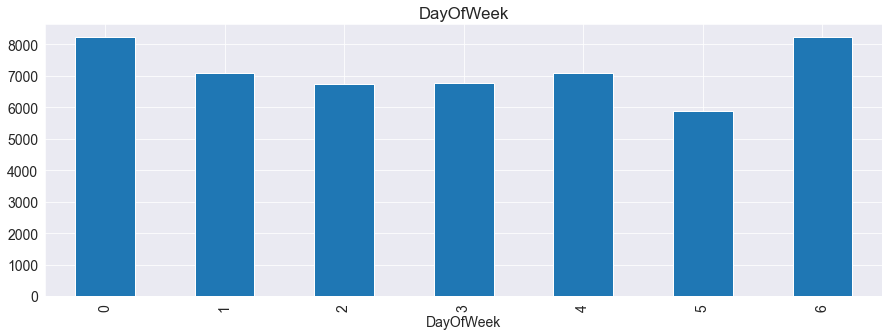

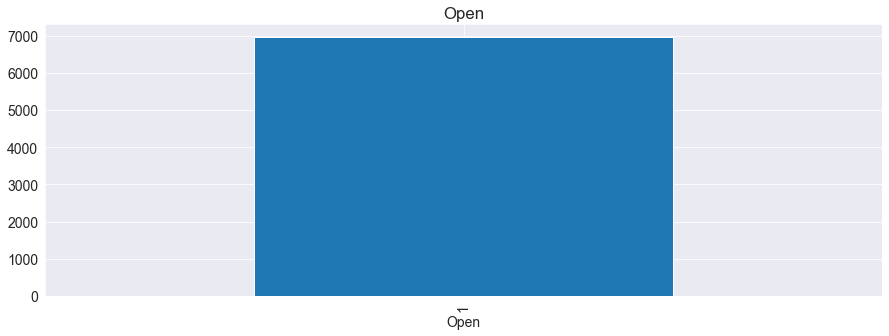

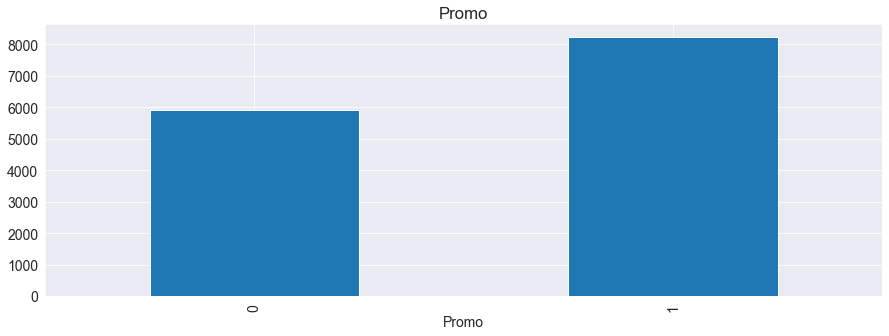

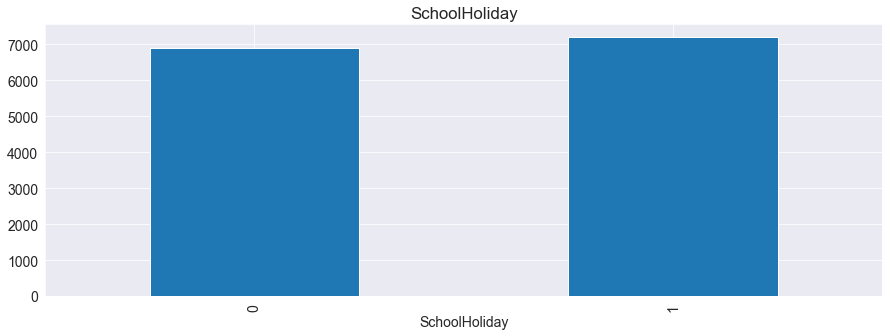

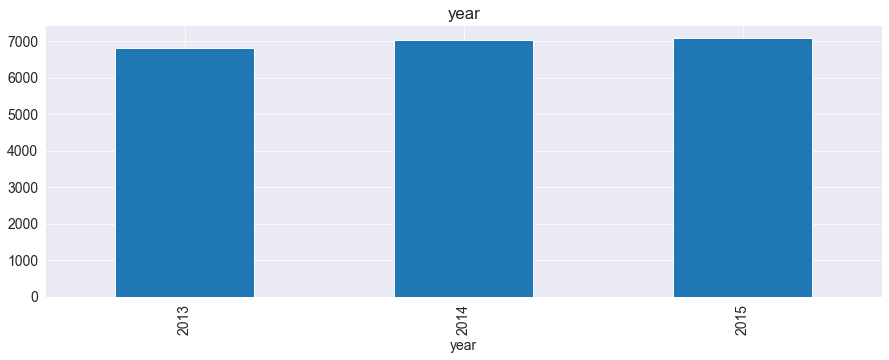

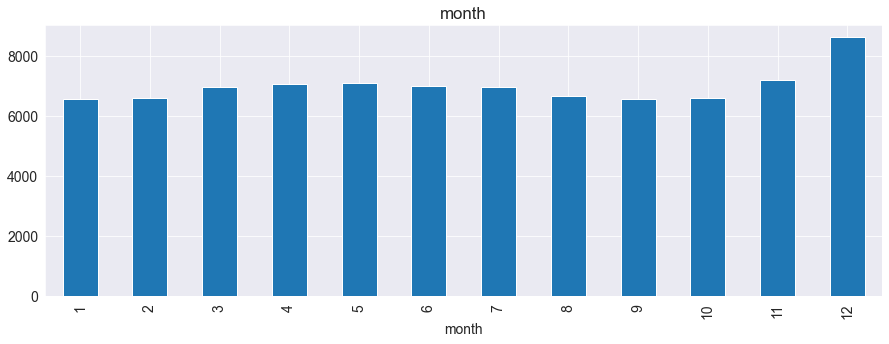

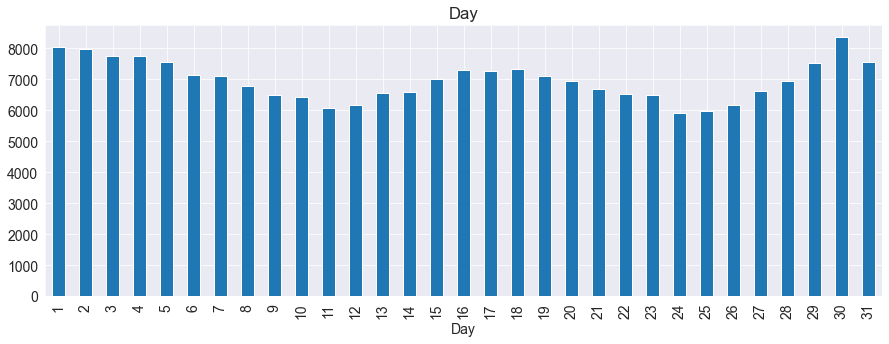

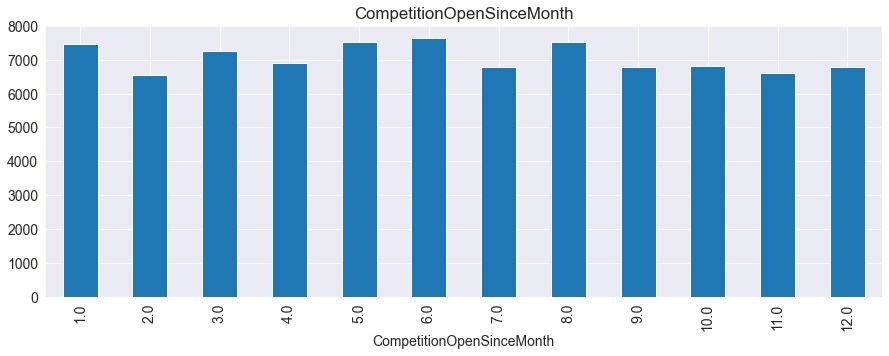

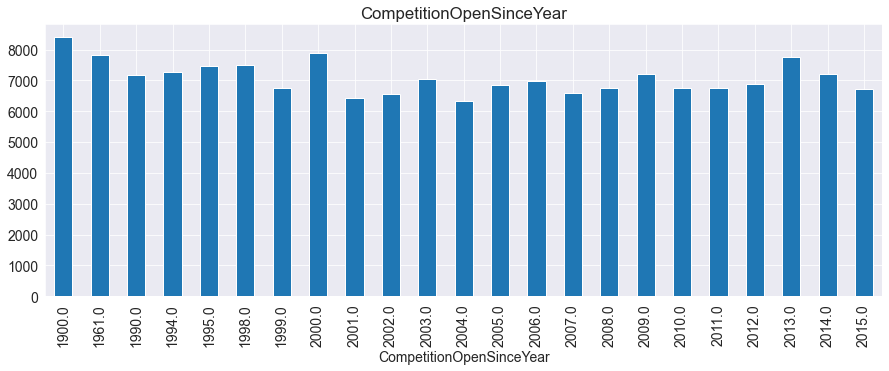

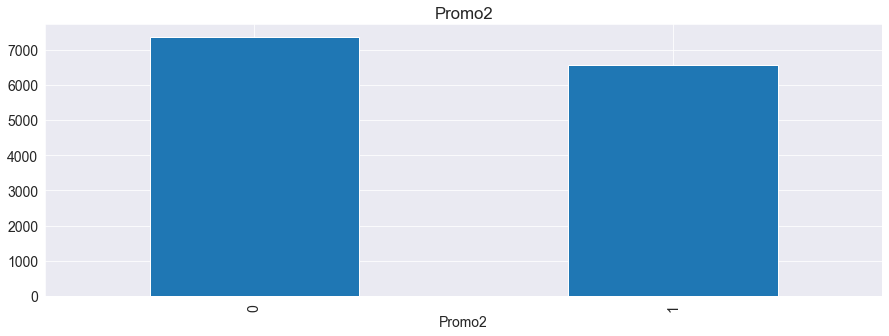

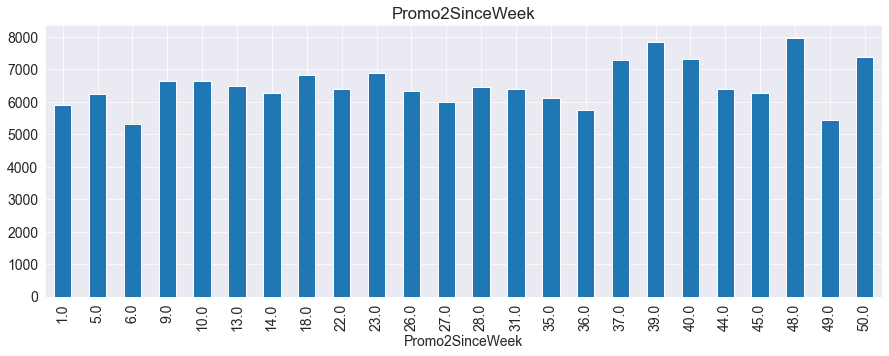

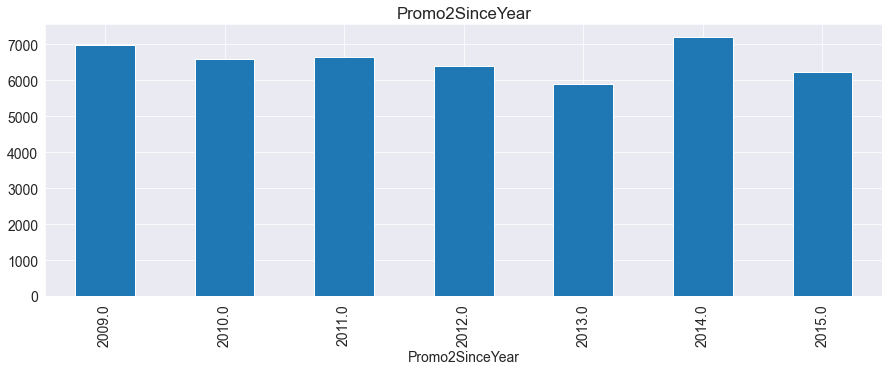

In [82]:
for feature in discrete_features:
    data = df.copy()
#     data[feature]= np.where(data[feature].isnull(),1,0)
#     plt.xticks(rotation=75)
    data.groupby(feature)['Sales'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [83]:
df.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


### Continuous features

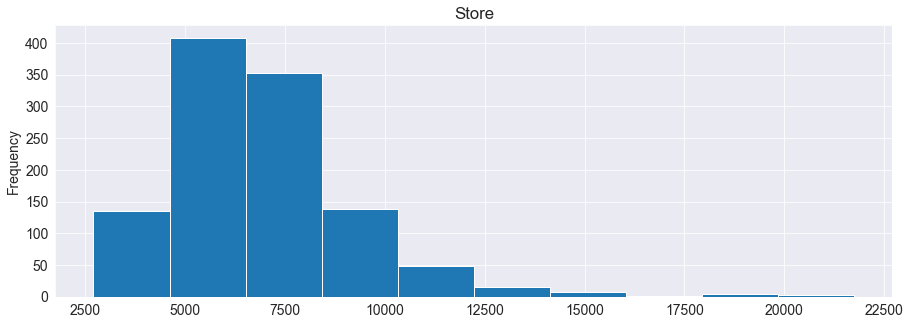

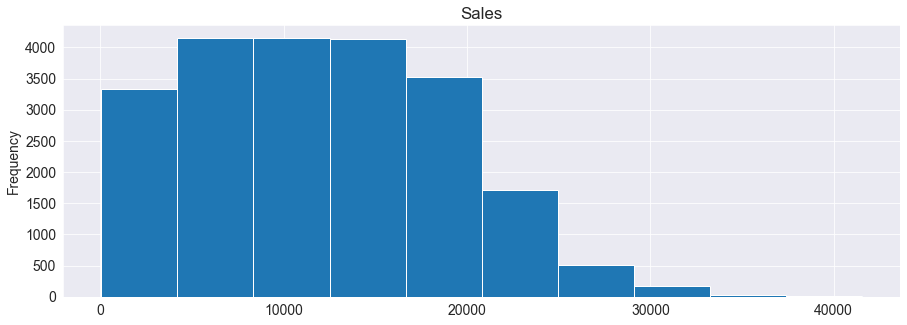

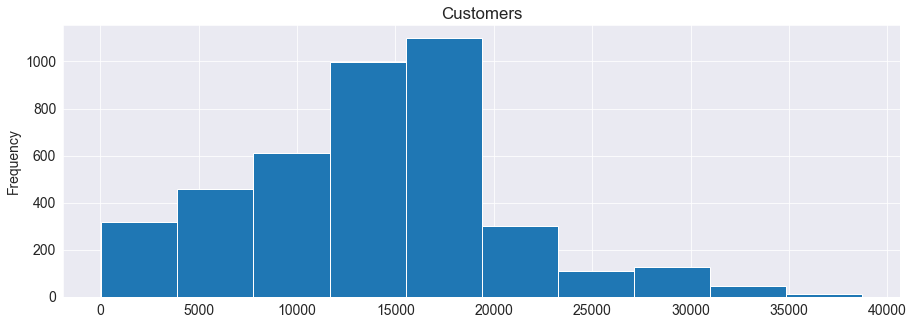

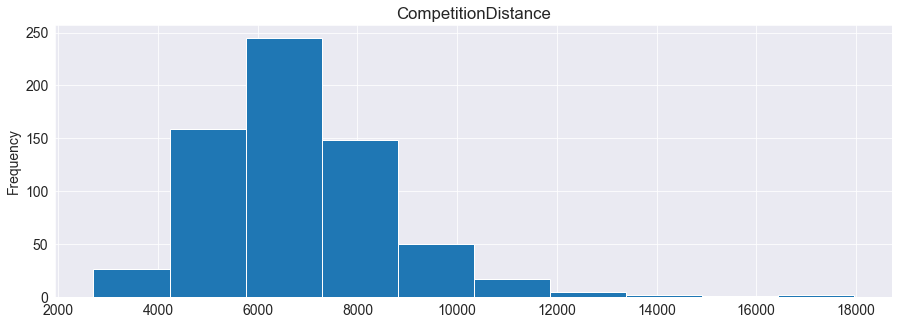

In [84]:
for feature in continuous_features:
    data = df.copy()
#     data[feature]= np.where(data[feature].isnull(),1,0)
#     plt.xticks(rotation=75)
    data.groupby(feature)['Sales'].mean().plot.hist()
    plt.title(feature)
    plt.show()

### Categorical Features

In [85]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='object']

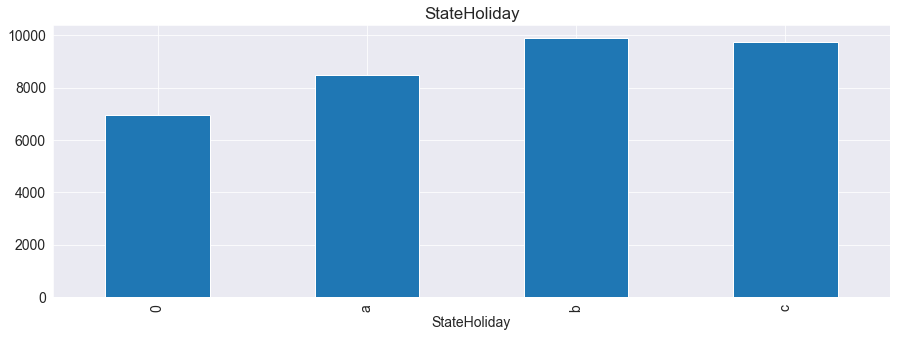

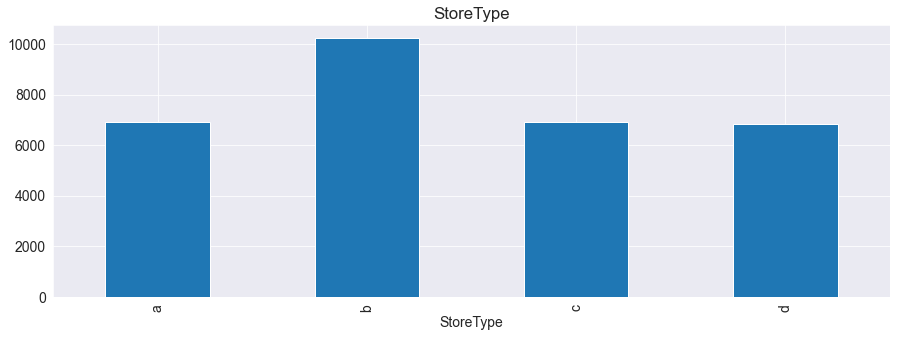

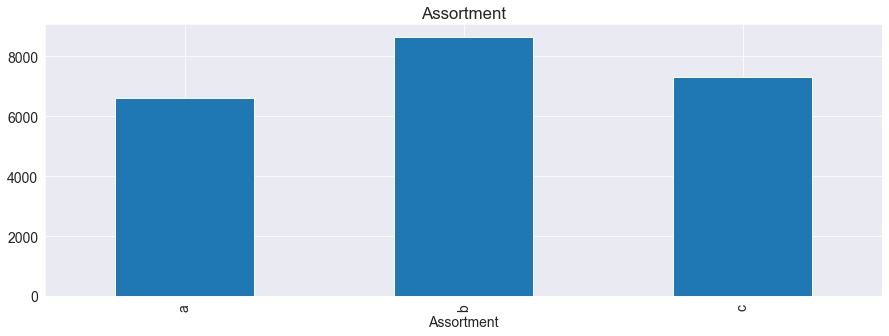

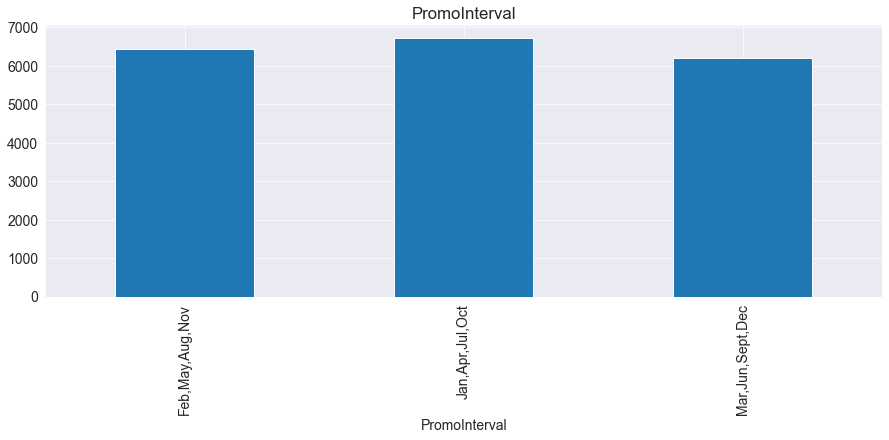

In [86]:
for feature in categorical_features:
    data = df.copy()
#     data[feature]= np.where(data[feature].isnull(),1,0)
#     plt.xticks(rotation=75)
    data.groupby(feature)['Sales'].mean().plot.bar()
    plt.title(feature)
    plt.show()

## Time-series Analysis

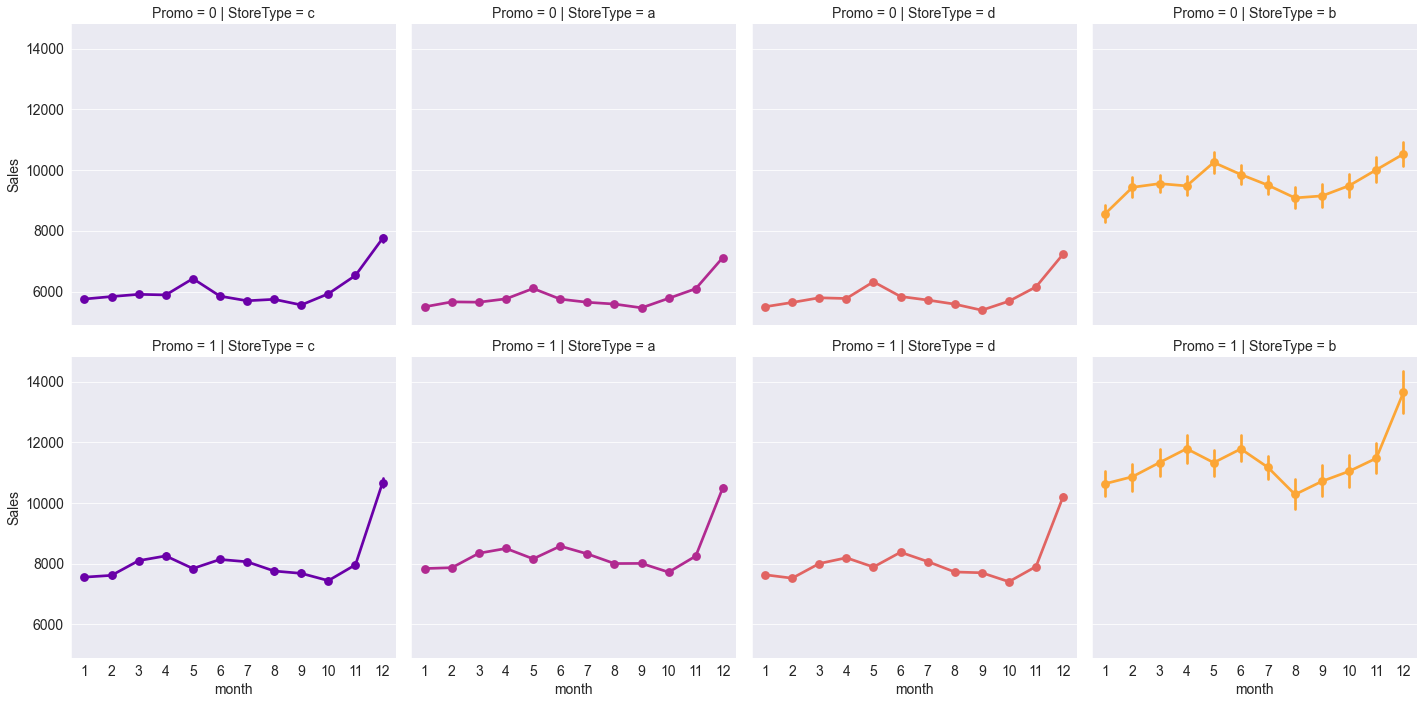

In [87]:
c = '#386B7F'
sns.factorplot(data = df, x = 'month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

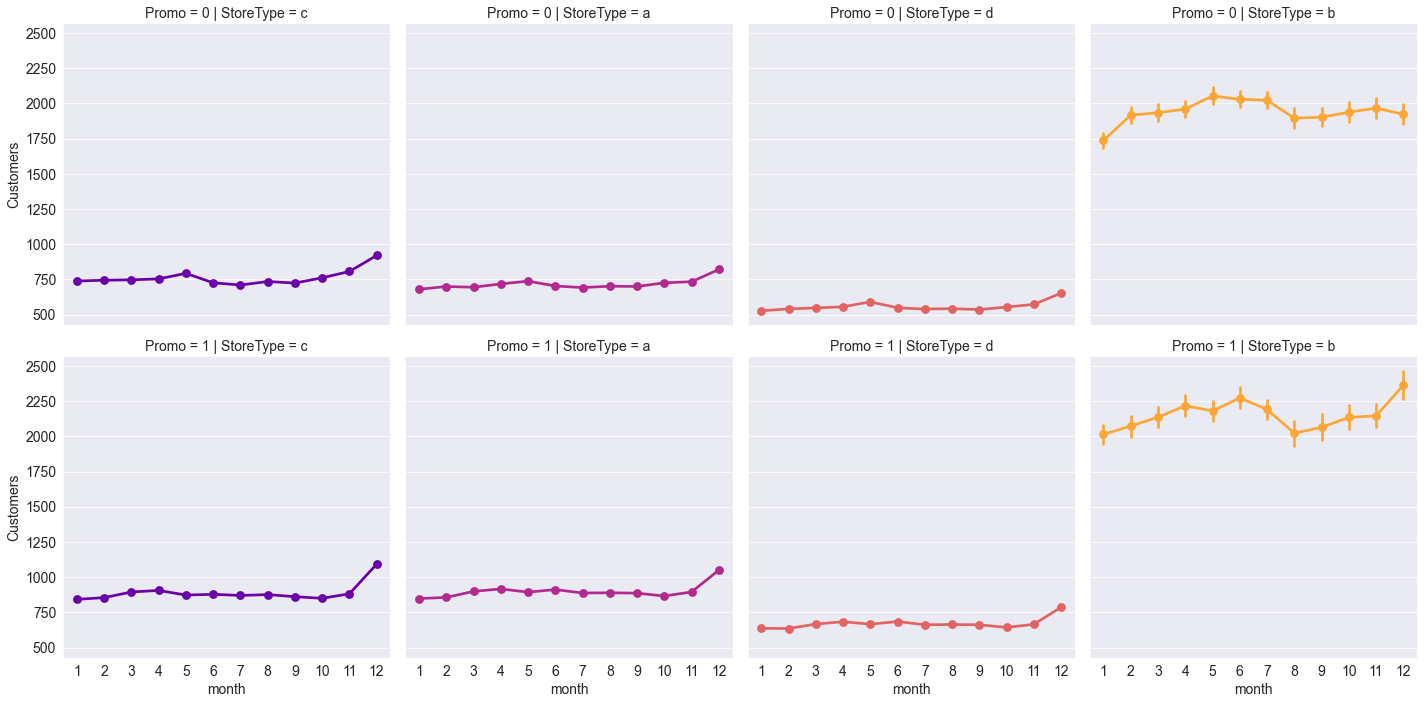

In [88]:
sns.factorplot(data=df, x='month',y='Customers',
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c
              )

In [89]:
df['SalePerCustomer'] = df['Sales']/df['Customers']

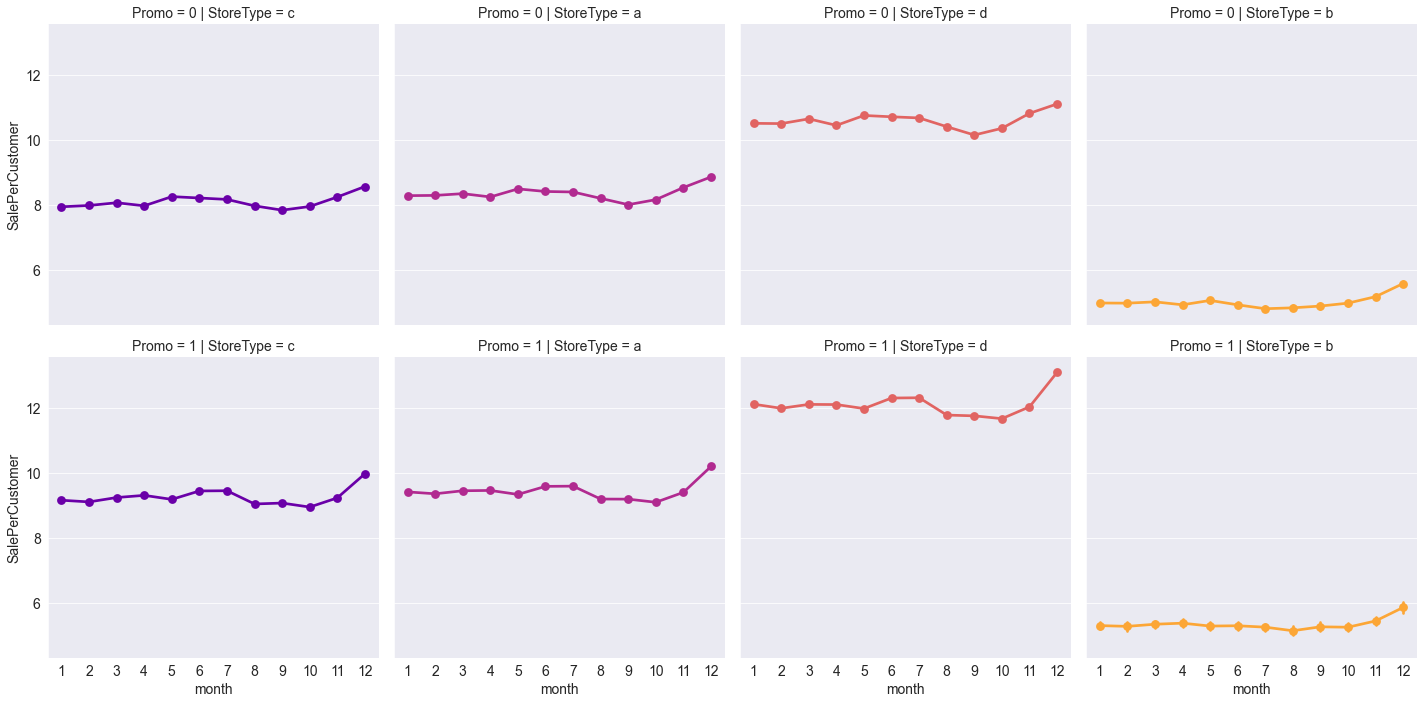

In [90]:
sns.factorplot(data = df, x = 'month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

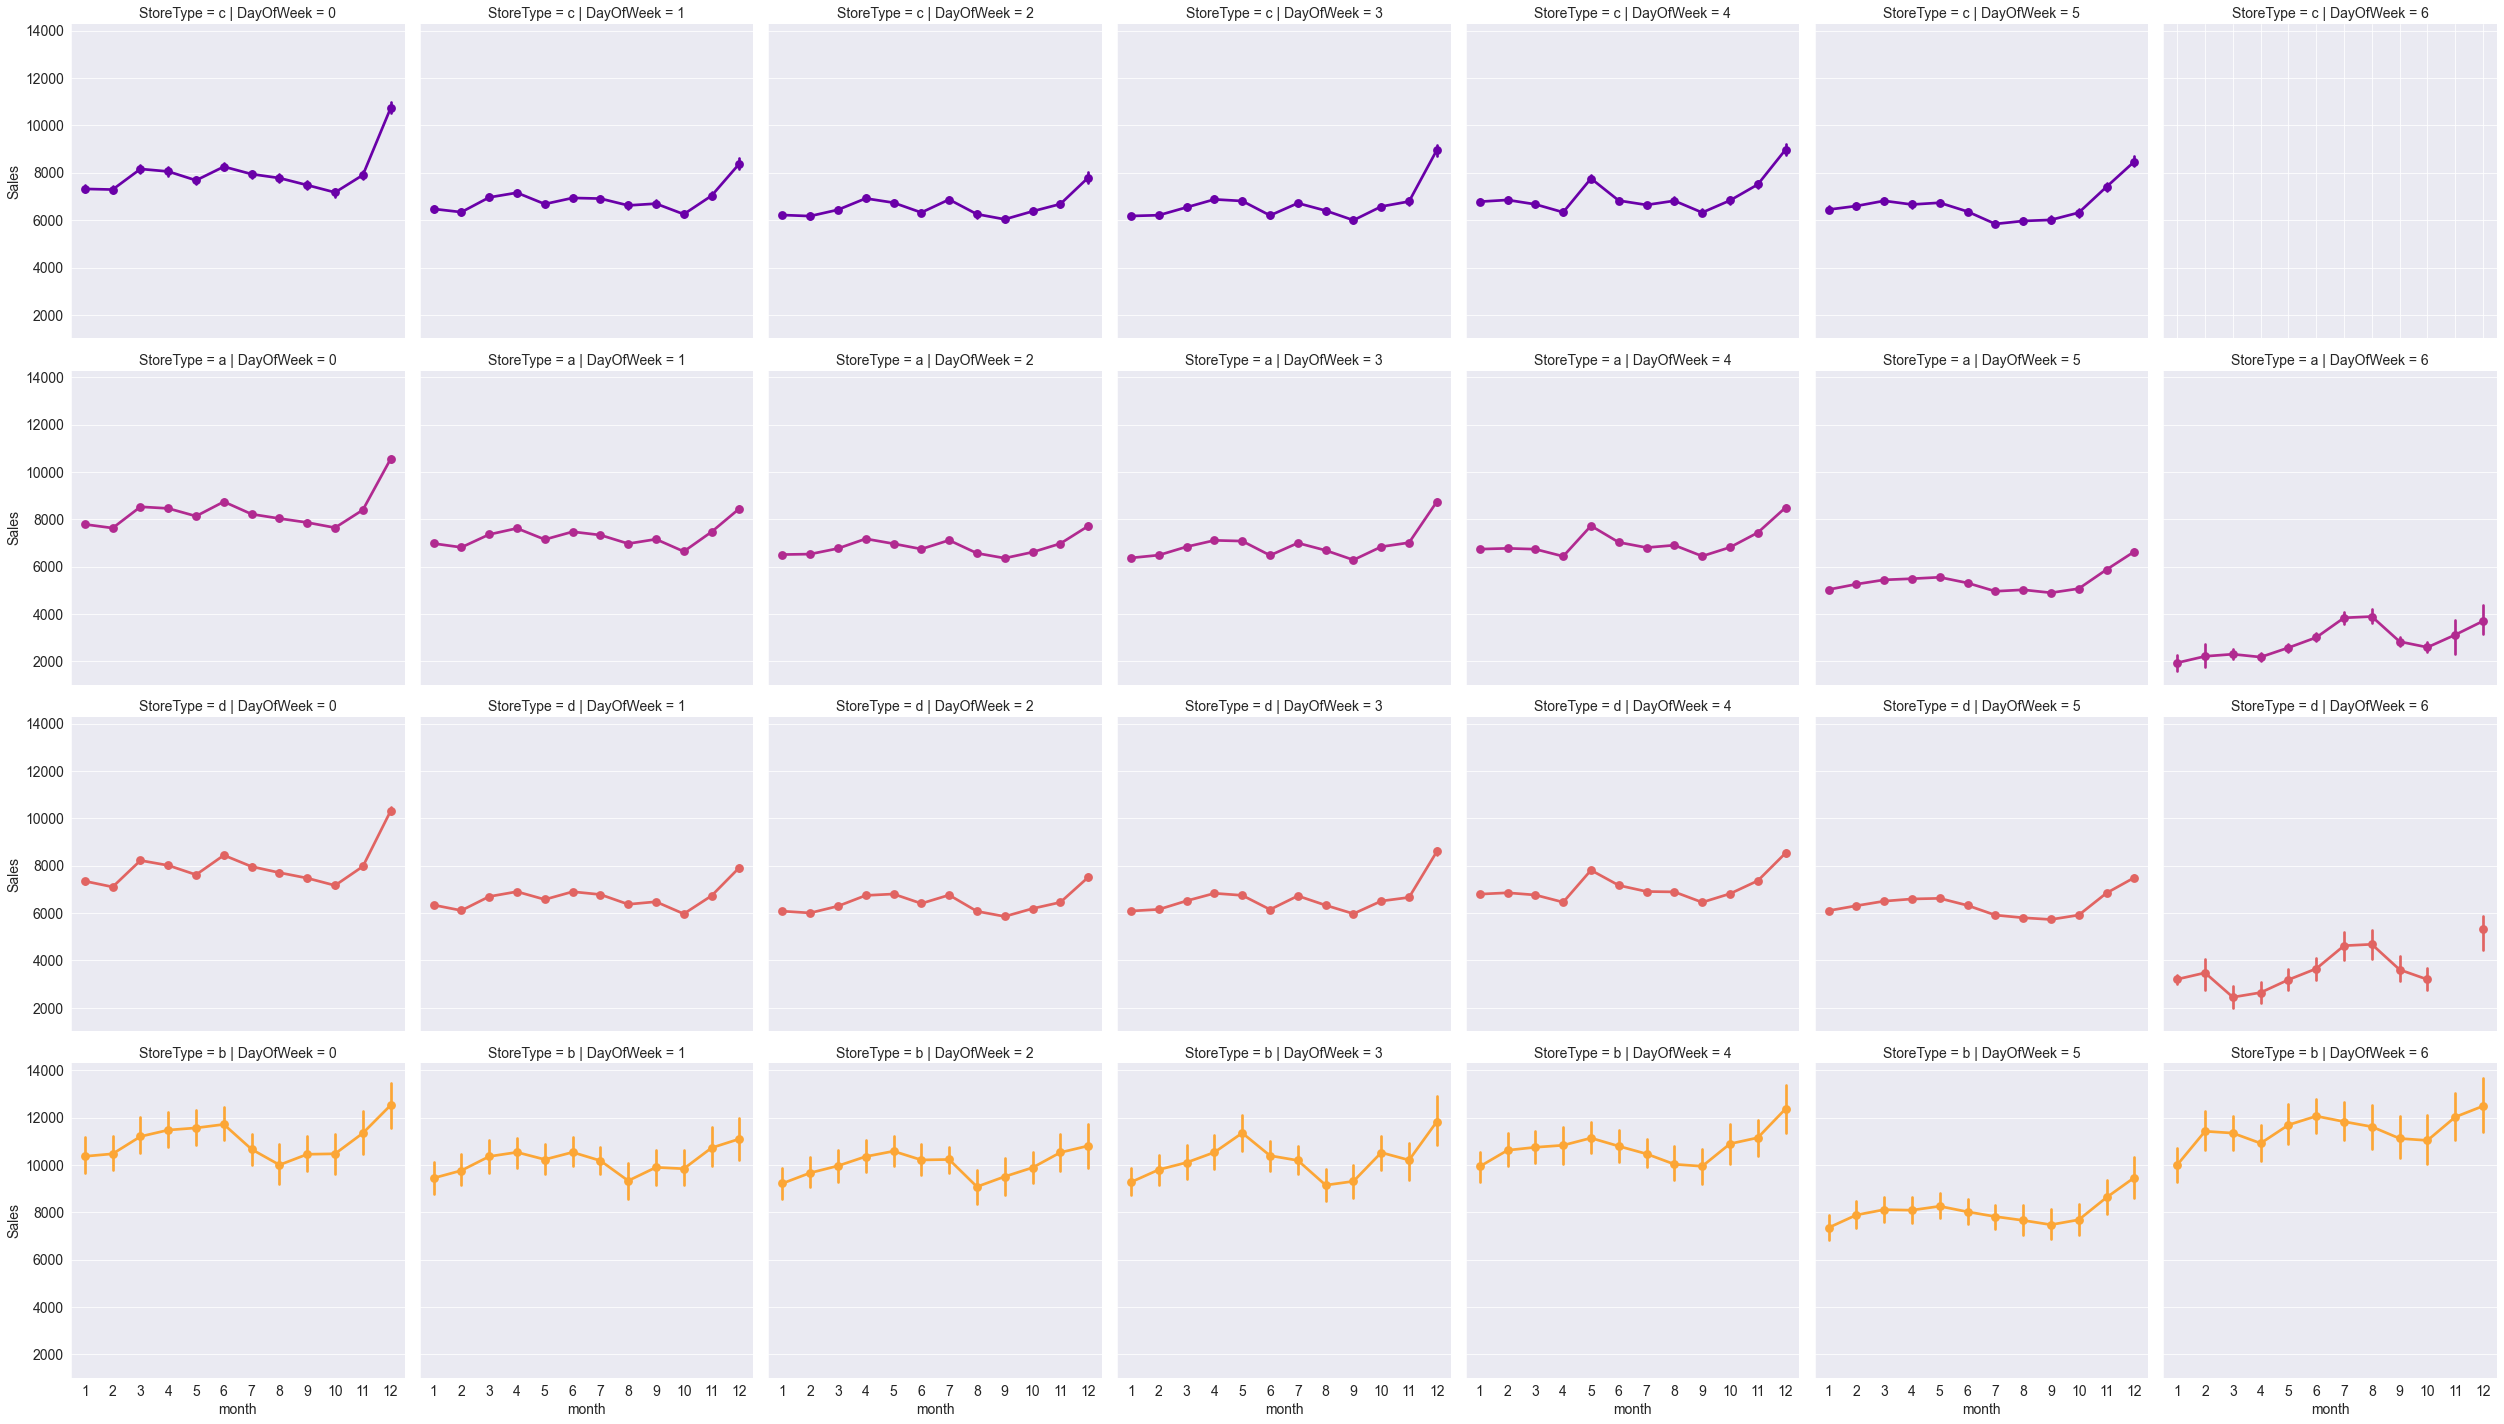

In [91]:
sns.factorplot(data=df, x='month',y='Sales',
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per promo in the store in rows
               color = c
              )

As we can see that storetype c is closed on Sunday and storetype d is closed on sunday from october to november

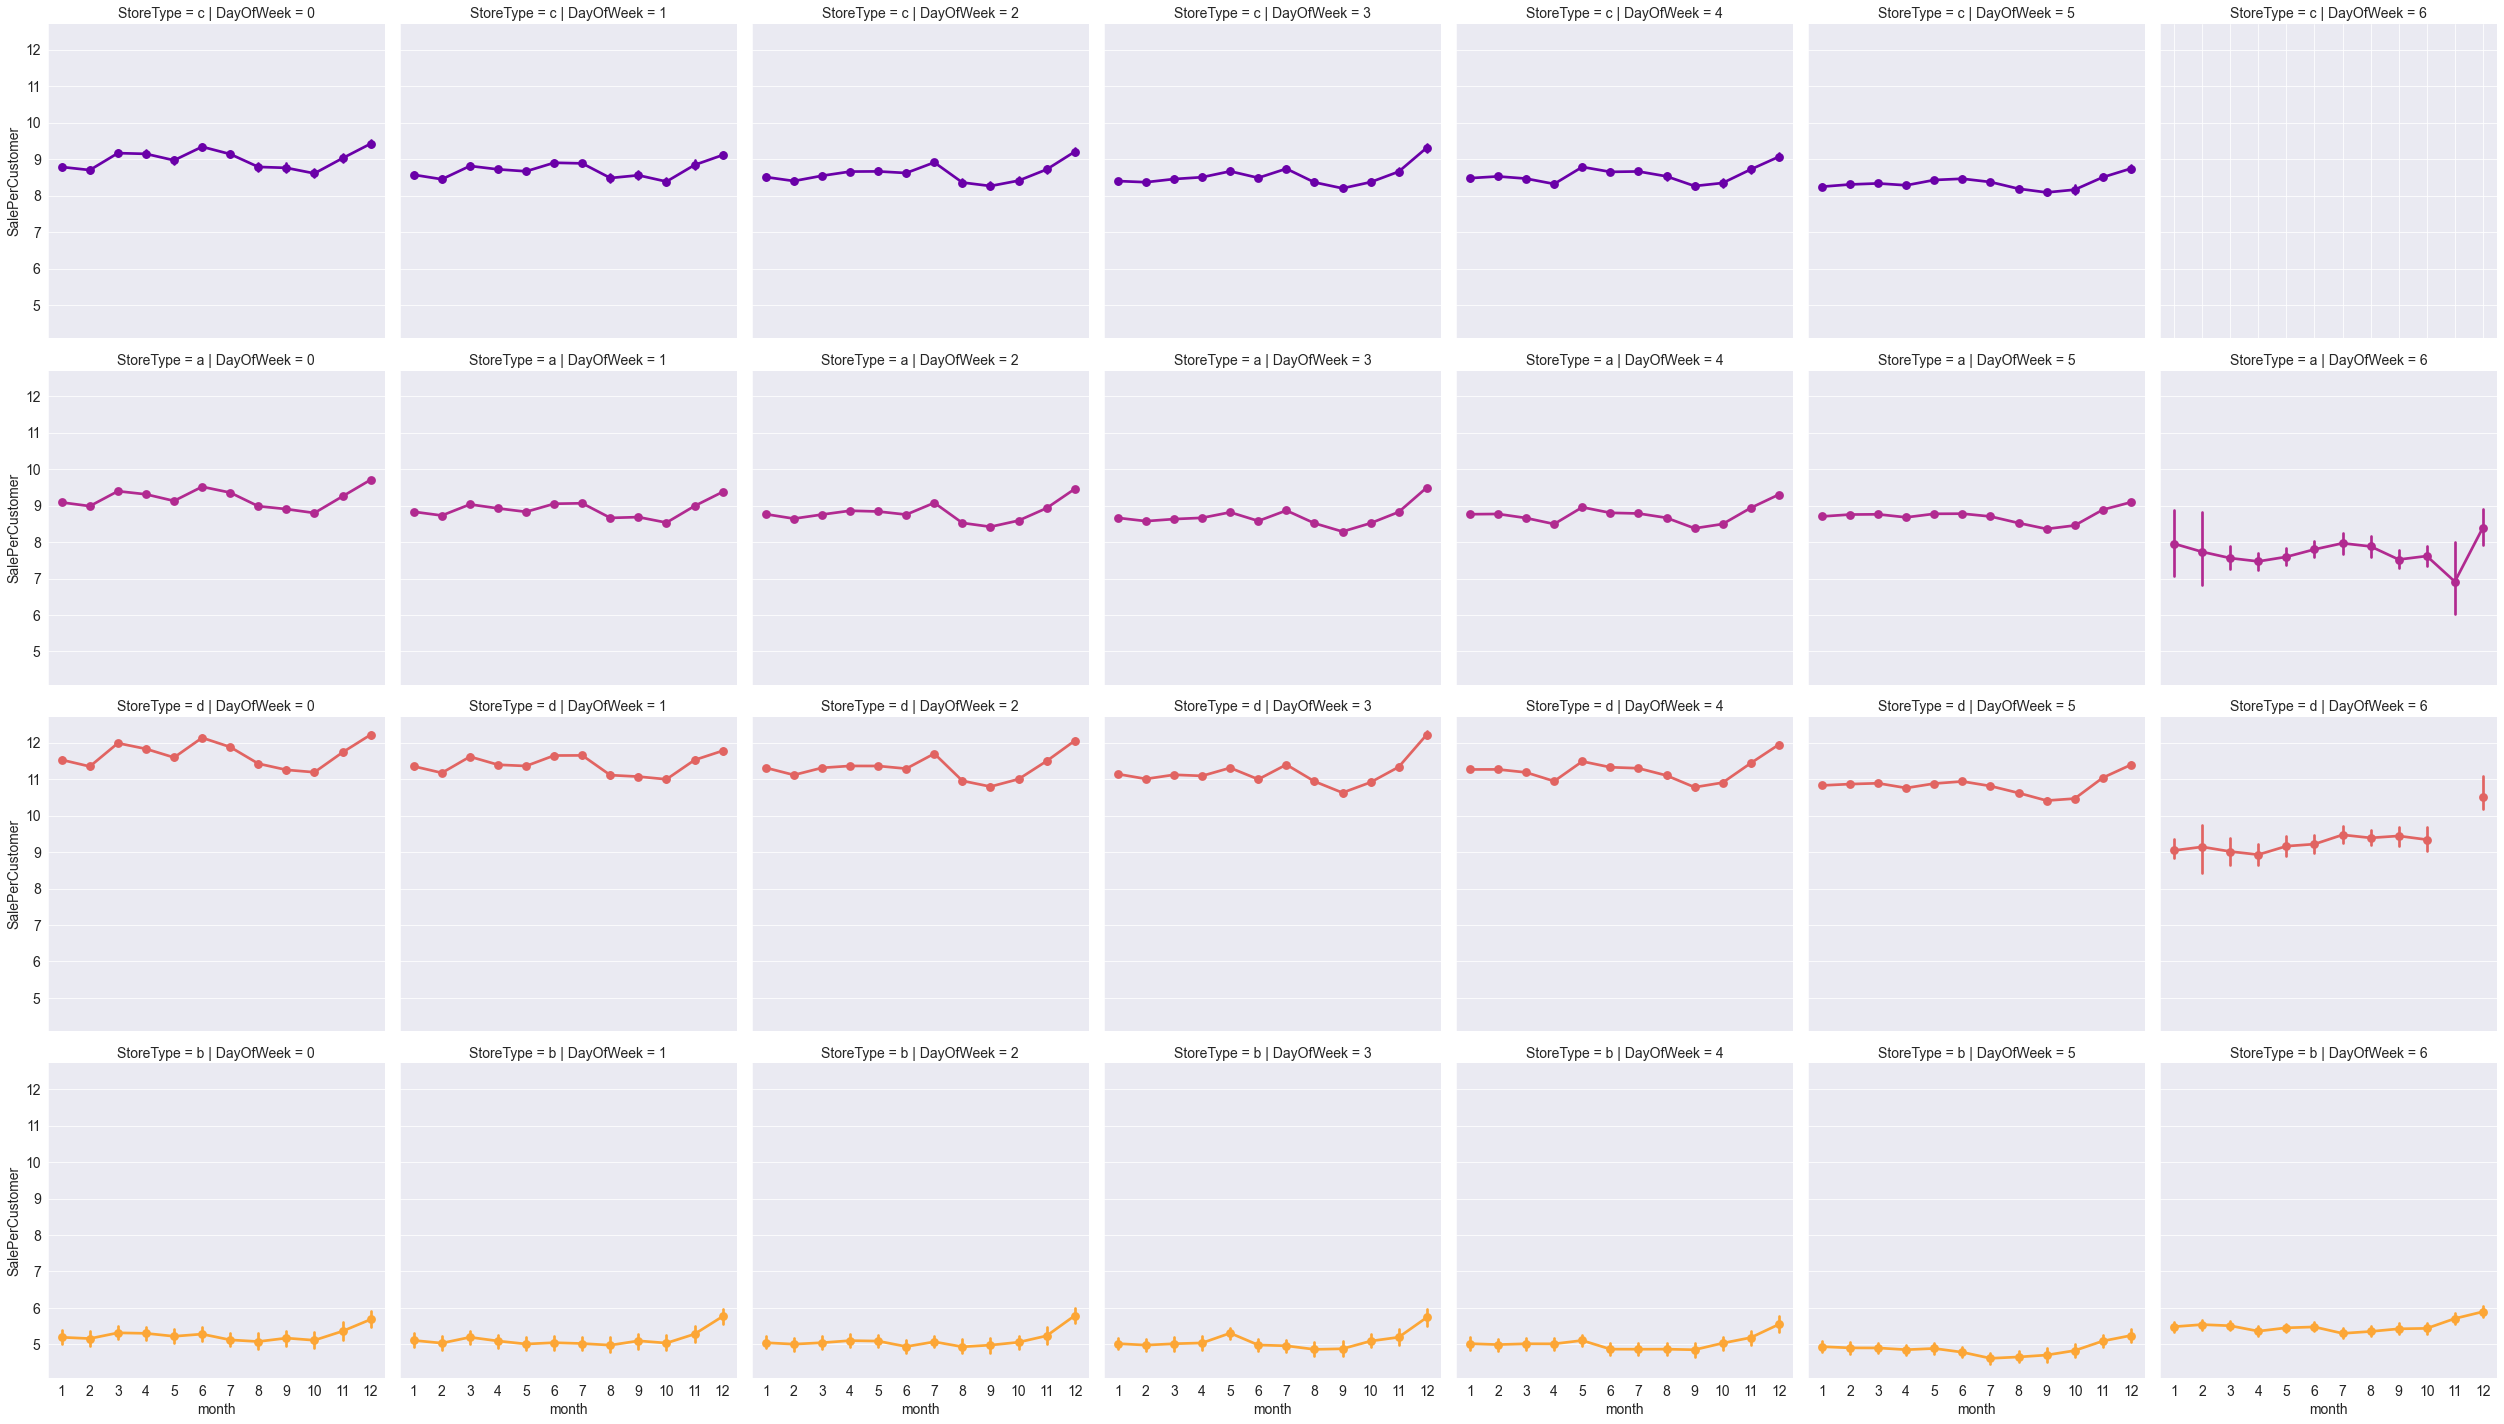

In [92]:
sns.factorplot(data=df, x='month',y='SalePerCustomer',
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per promo in the store in rows
               color = c
              )

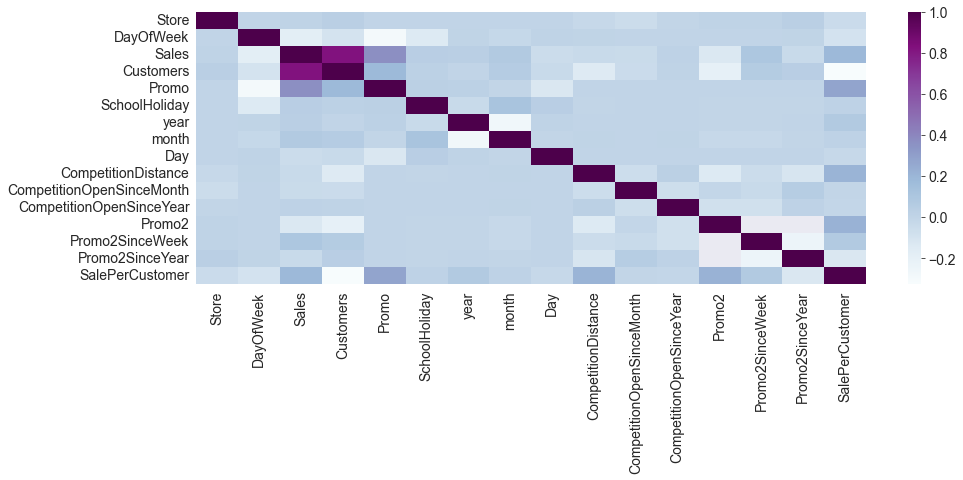

In [93]:
corr_all = df.drop('Open', axis = 1).corr()

sns.heatmap(corr_all, cbar=True, cmap = "BuPu")      
plt.show()


We can see that sales and customer columns are highly correlated

### Conclusions:


## Pre-processing

### Train DataFrame:
Let's perform EDA on train df.

In [17]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'Day'],
      dtype='object')

In [18]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,4,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,4,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,4,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,4,4822,559,1,1,0,1,2015,7,31


In [134]:
train.Open.unique()

array([1], dtype=int64)

There are 2 unique values of Open feature. 0: when store is closed, 1: when store is opened.
let's visualize this.

In [20]:
Open_train = train[train['Open']==1]
Close_train = train[train['Open']==0]

In [21]:
print('Total = ', len(train))
print('Number of shops/days OPEN = ', len(Open_train))
print('Number of shops/days CLOSED = ', len(Close_train))

Total =  1017209
Number of shops/days OPEN =  844392
Number of shops/days CLOSED =  172817


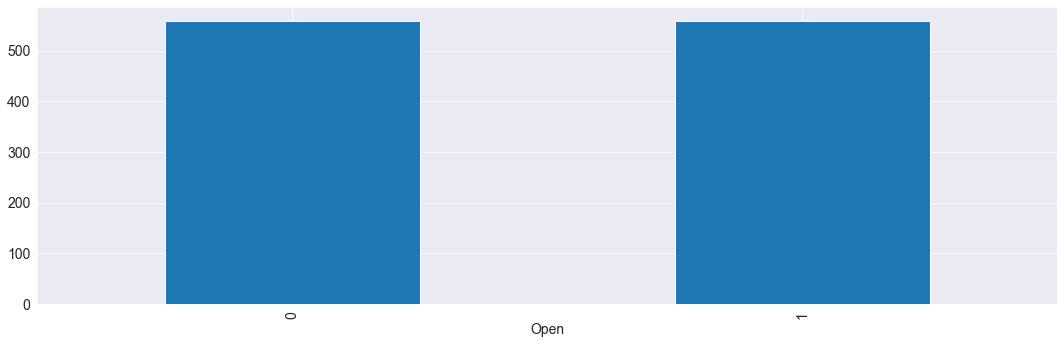

In [22]:
train['Store'].groupby(train['Open']).mean().plot(kind='bar', figsize=(15,5))
plt.tight_layout()

Text(0.5, 1.0, 'Average SALES per MONTH')

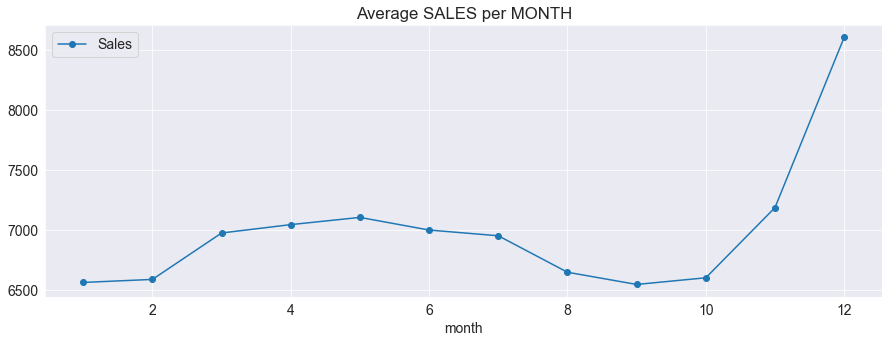

In [145]:
axis = train.groupby('month')[['Sales']].mean().plot( marker = 'o')
axis.set_title('Average SALES per MONTH')

<AxesSubplot:xlabel='month'>

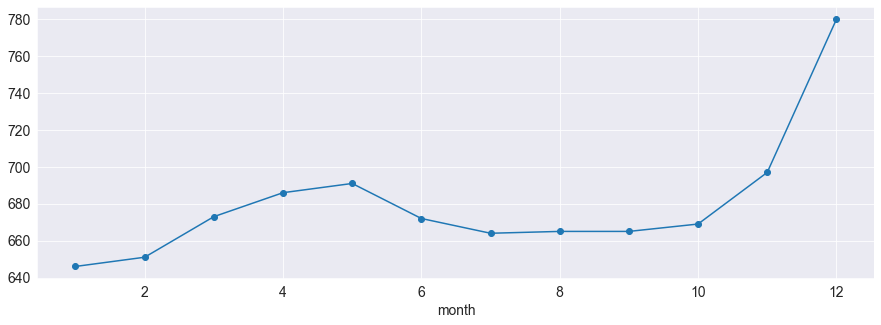

In [149]:
train.groupby('month')['Customers'].median().plot(figsize=(15,5), marker='o')

Sales is increasing from November to december. Sales and customers are positively correlated.

Text(0.5, 1.0, 'Average SALES per DayOfWeek')

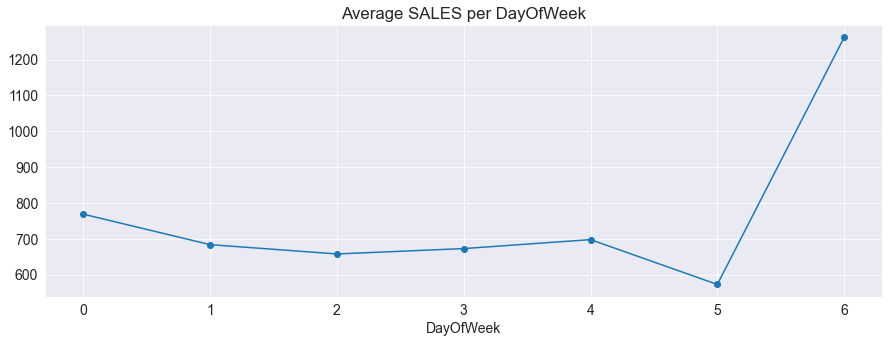

In [136]:
train.groupby('DayOfWeek')['Customers'].median().plot( figsize=(15,5), marker = 'o')
plt.title('Average SALES per DayOfWeek')

On Sunday the most customer visists the store.

<AxesSubplot:ylabel='Frequency'>

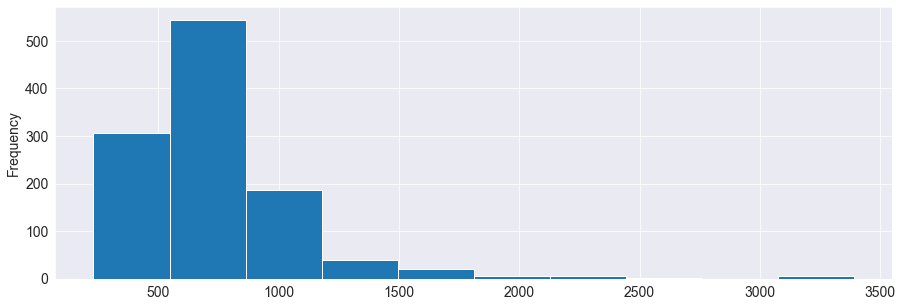

In [147]:
train.groupby('Store')['Customers'].median().plot(kind = 'hist',figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

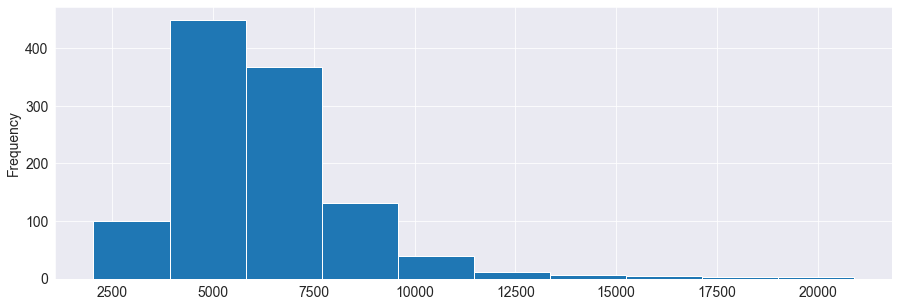

In [26]:
train.groupby('Store')['Sales'].median().plot(kind = 'hist',figsize=(15,5))

There is a seasonal trend in sales. More customers visits the store from january to july.

<AxesSubplot:xlabel='StateHoliday'>

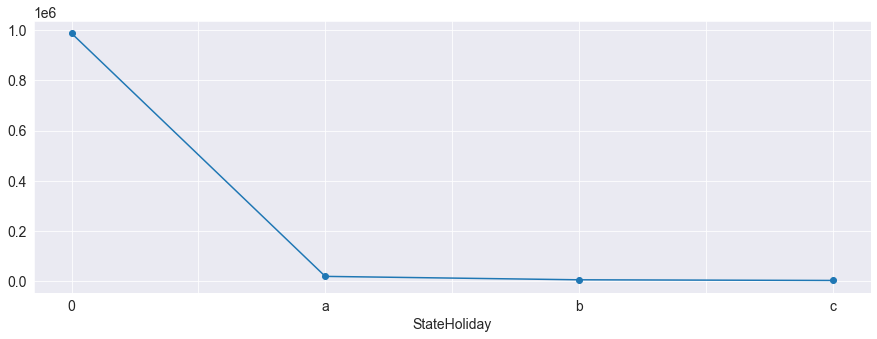

In [28]:
train.groupby('StateHoliday')['Sales'].size().plot(figsize=(15,5), marker='o')

<AxesSubplot:xlabel='DayOfWeek'>

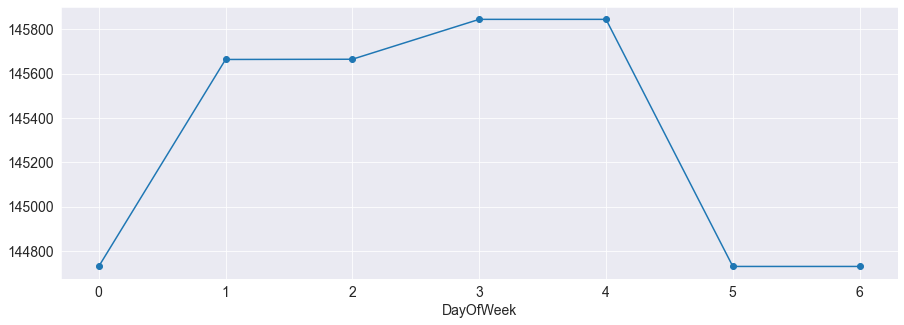

In [30]:
train.groupby('DayOfWeek')['Sales'].size().plot(figsize=(15,5), marker='o')

<AxesSubplot:xlabel='month', ylabel='Sales'>

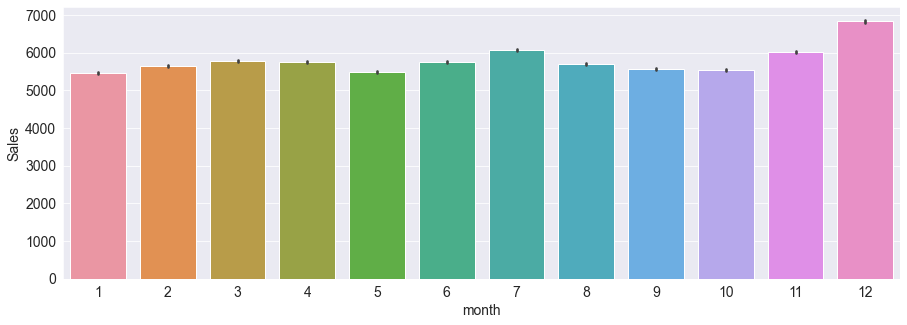

In [31]:
sns.barplot(x='month', y='Sales', data = train)

<AxesSubplot:xlabel='Day'>

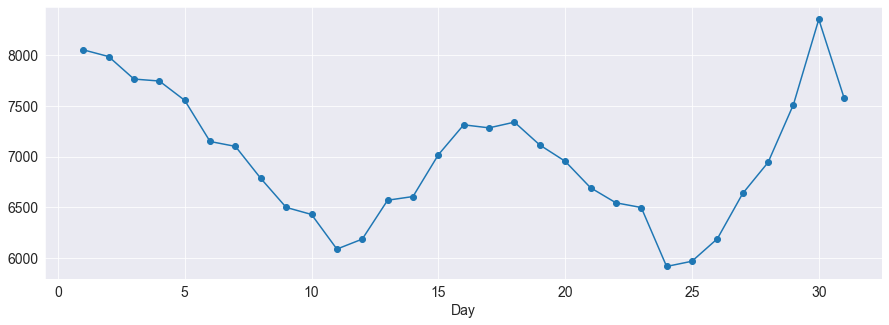

In [152]:
train.groupby('Day')['Sales'].mean().plot(marker='o')

<AxesSubplot:xlabel='Day', ylabel='Sales'>

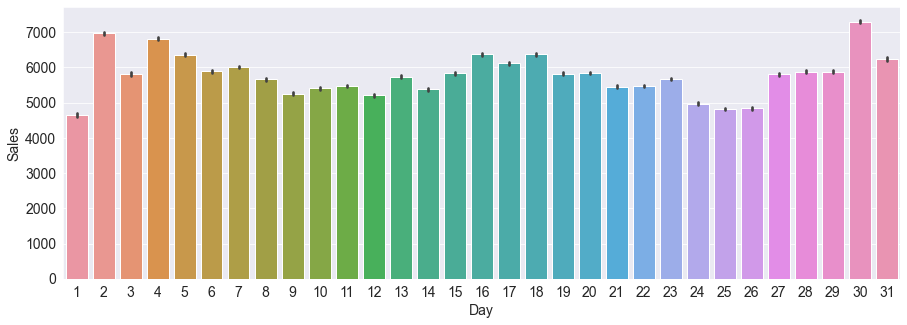

In [32]:
sns.barplot(x='Day', y='Sales', data = train)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

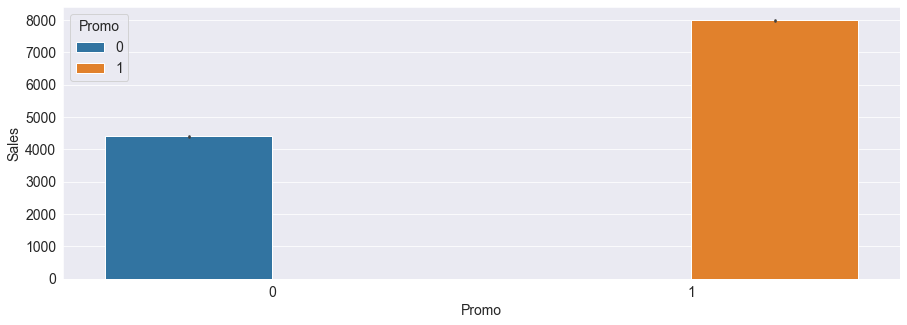

In [33]:
sns.barplot(data=train, x='Promo', y='Sales', hue='Promo')

#### Let's explore on Open feature

<AxesSubplot:xlabel='Open', ylabel='Sales'>

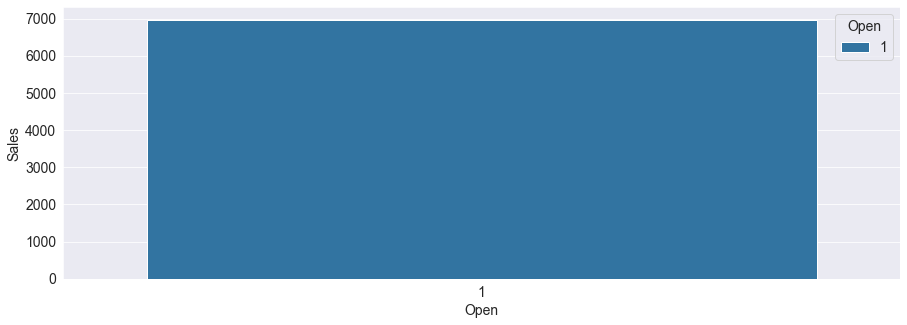

In [65]:
sns.barplot(data=train, x='Open', y='Sales', hue='Open')

##### When store is not open and sales is 0.

In [35]:
train[(train.Open!=0) & (train.Sales!=0)]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,4,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,4,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,4,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,4,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,682,1,3375,566,1,0,a,1,2013,1,1
2013-01-01,733,1,10765,2377,1,0,a,1,2013,1,1
2013-01-01,769,1,5035,1248,1,0,a,1,2013,1,1


##### When store is open and sales is 0.

In [36]:
train[(train.Open==0) & (train.Sales==0)]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,292,4,0,0,0,1,0,1,2015,7,31
2015-07-31,876,4,0,0,0,1,0,1,2015,7,31
2015-07-30,292,3,0,0,0,1,0,1,2015,7,30
2015-07-30,876,3,0,0,0,1,0,1,2015,7,30
2015-07-29,292,2,0,0,0,1,0,1,2015,7,29
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,1,0,0,0,0,a,1,2013,1,1
2013-01-01,1112,1,0,0,0,0,a,1,2013,1,1
2013-01-01,1113,1,0,0,0,0,a,1,2013,1,1


There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts we will drop these values.

Let's check about open store with 0 sales

In [37]:
zero_sales = train[(train.Open !=0) & (train.Sales==0)]
zero_sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-05-15,971,4,0,0,1,0,0,1,2015,5,15
2015-03-26,674,3,0,0,1,0,0,0,2015,3,26
2015-02-05,699,3,0,0,1,1,0,0,2015,2,5
2014-10-01,708,2,0,0,1,1,0,0,2014,10,1
2014-09-22,357,0,0,0,1,0,0,0,2014,9,22


54 records are peresent in which store is open but sale is 0. So, we are not going to use these records in our forecast

In [38]:
train = train[(train.Open!=0) & (train.Sales!=0)]

In [39]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day
Date,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,2015,7,31
2015-07-31,2,4,6064,625,1,1,0,1,2015,7,31
2015-07-31,3,4,8314,821,1,1,0,1,2015,7,31
2015-07-31,4,4,13995,1498,1,1,0,1,2015,7,31
2015-07-31,5,4,4822,559,1,1,0,1,2015,7,31


## Store Dataframe

In [40]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [41]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


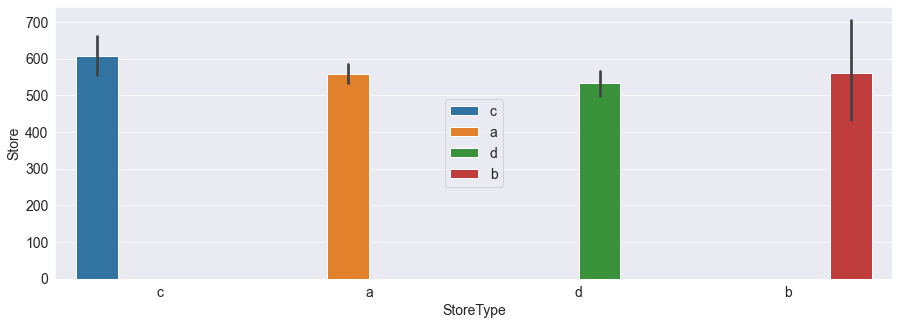

In [161]:
sns.barplot(data=store, y='Store', x='StoreType', hue='StoreType')
plt.legend(loc='center')

c storeType has highest number of stores.

<AxesSubplot:xlabel='Assortment', ylabel='Store'>

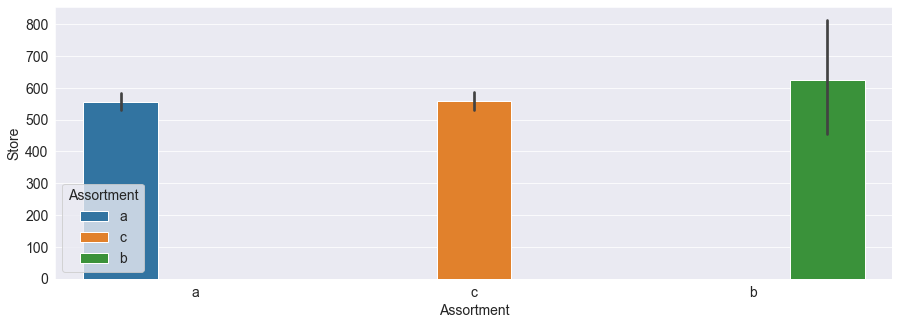

In [45]:
sns.barplot(data=store, y='Store', x='Assortment', hue='Assortment')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Count'>

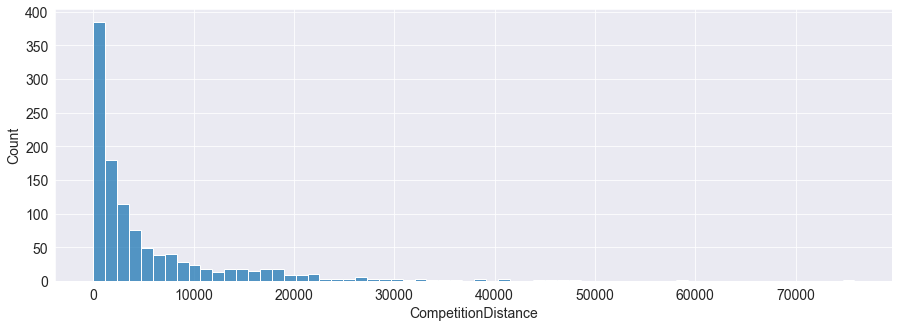

In [46]:
sns.histplot(data=store, x='CompetitionDistance')

The distribution is right skewed.

In [168]:
store.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

<AxesSubplot:xlabel='CompetitionOpenSinceYear'>

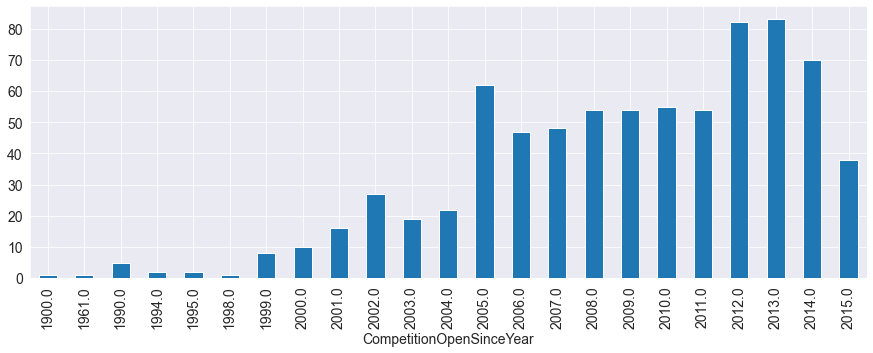

In [189]:
store.groupby('CompetitionOpenSinceYear')['CompetitionOpenSinceYear'].size().plot(kind='bar')

Maximum competitions open in 2013.

<AxesSubplot:xlabel='Promo2'>

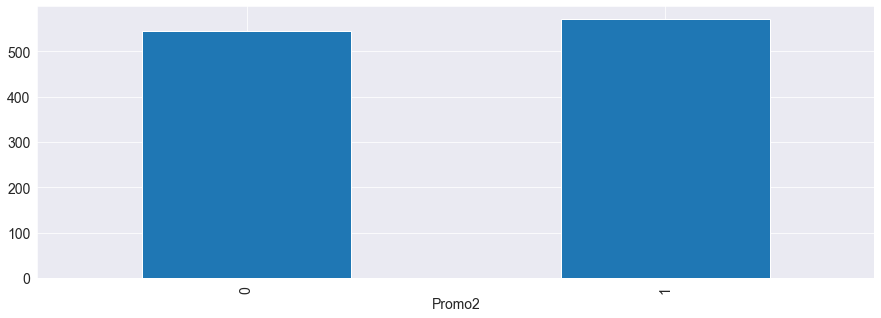

In [191]:
store.groupby('Promo2')['Store'].size().plot(kind='bar')

<AxesSubplot:xlabel='CompetitionOpenSinceMonth,CompetitionOpenSinceYear'>

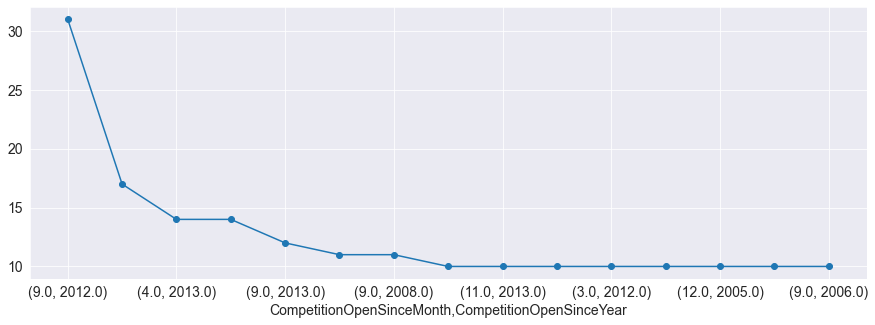

In [231]:
store.groupby(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']).size().sort_values(ascending=False)[:15].plot(marker='o')

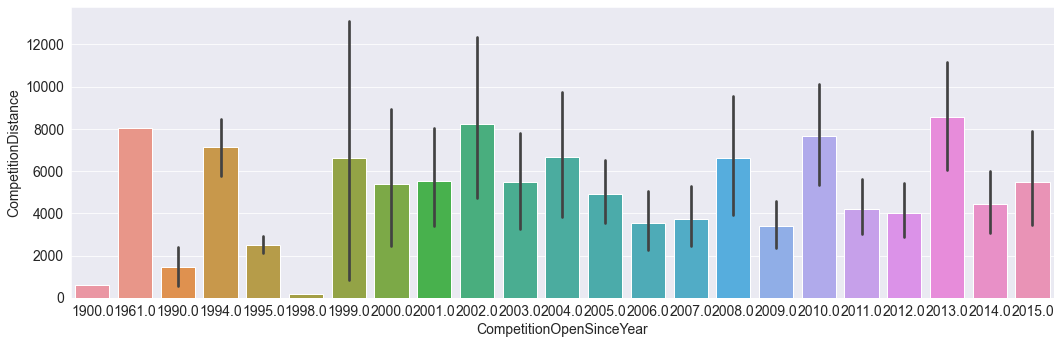

In [223]:
sns.barplot(data=store, x='CompetitionOpenSinceYear', y='CompetitionDistance')
plt.tight_layout()

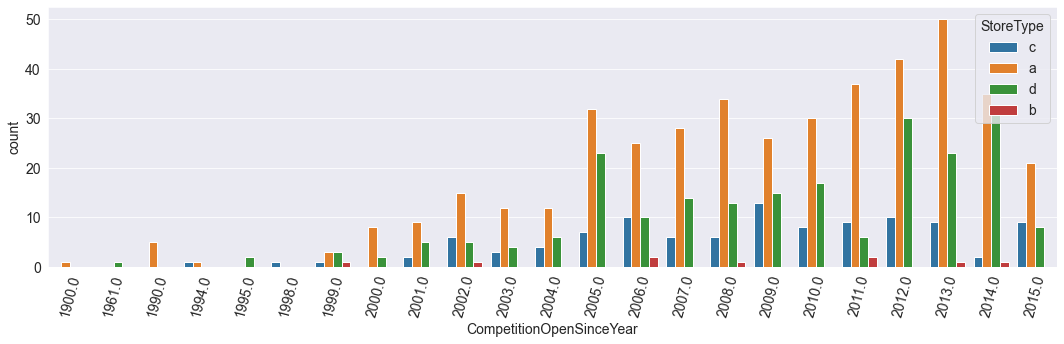

In [71]:
plt.xticks(rotation=75)
sns.countplot(data=store, x='CompetitionOpenSinceYear', hue='StoreType')
plt.tight_layout()

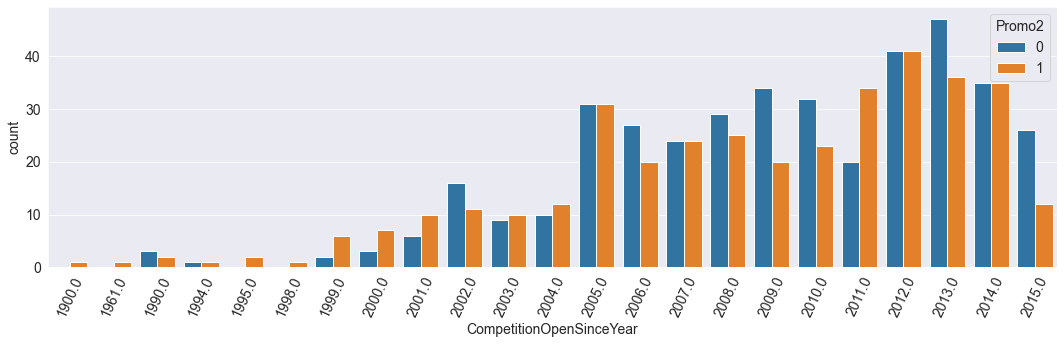

In [61]:
plt.xticks(rotation=65)
sns.countplot(data=store, x='CompetitionOpenSinceYear', hue='Promo2')
plt.tight_layout()

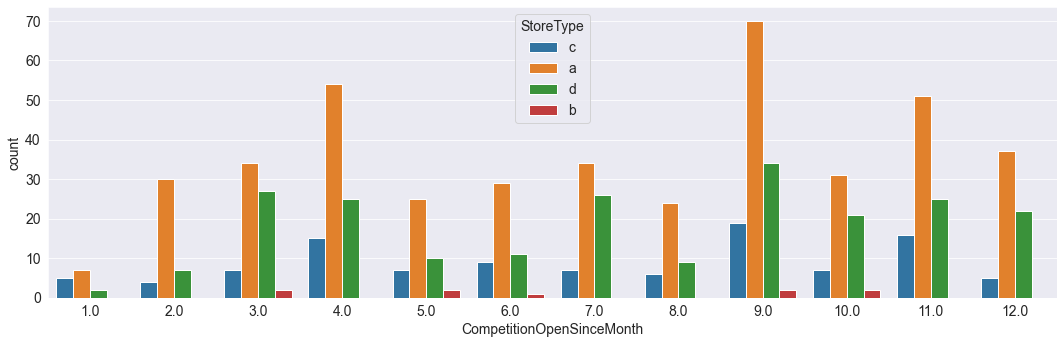

In [52]:
sns.countplot(data=store, x='CompetitionOpenSinceMonth', hue='StoreType')
plt.tight_layout()

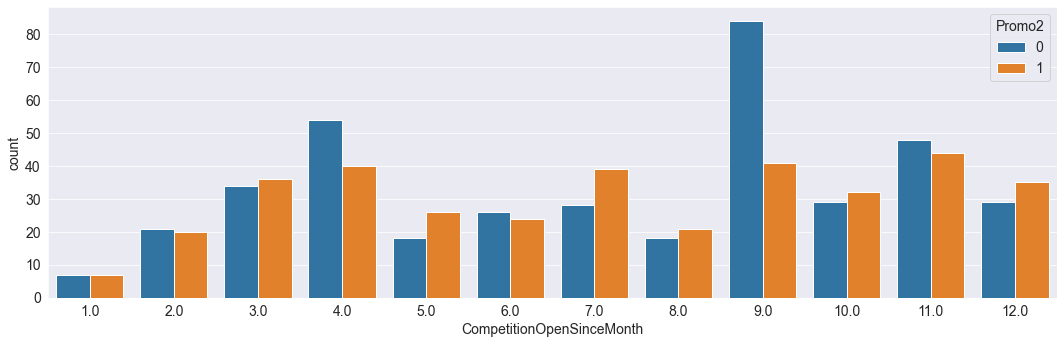

In [53]:
sns.countplot(data=store, x='CompetitionOpenSinceMonth', hue='Promo2')
plt.tight_layout()

In [72]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


<AxesSubplot:xlabel='StoreType', ylabel='Store'>

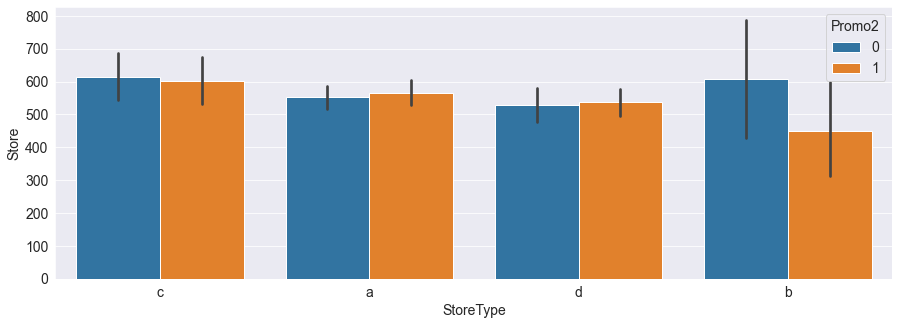

In [82]:
sns.barplot(data= store, x='StoreType', y='Store', hue='Promo2')

<AxesSubplot:xlabel='StoreType,Promo2SinceYear'>

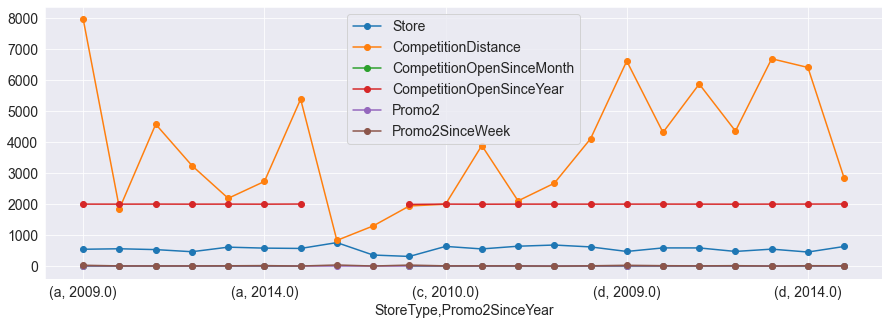

In [107]:
store.groupby(['StoreType','Promo2SinceYear']).mean().plot(marker='o')

<AxesSubplot:xlabel='PromoInterval', ylabel='count'>

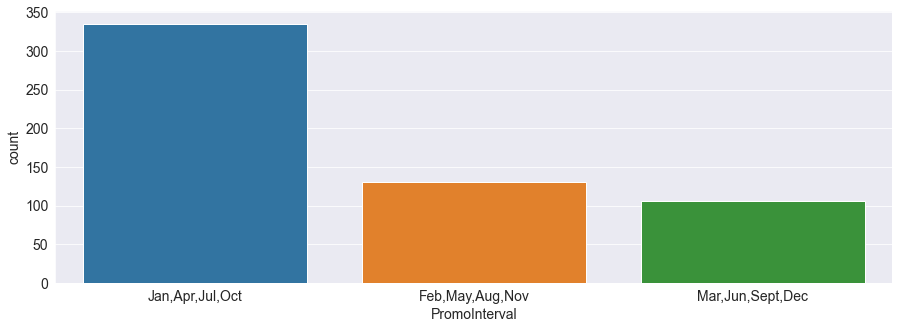

In [126]:
sns.countplot(data= store, x= 'PromoInterval')

### Merging the train df with store df

In [128]:
df = pd.merge(train, store, on = 'Store', how='inner')

In [129]:
df.shape

(844338, 20)

In [130]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,3,5020,546,1,1,0,1,2015,7,30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,2,4782,523,1,1,0,1,2015,7,29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,1,5011,560,1,1,0,1,2015,7,28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,0,6102,612,1,1,0,1,2015,7,27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [232]:
df.plot()

<AxesSubplot:>

Error in callback <function flush_figures at 0x0000019F7CB59C10> (for post_execute):



KeyboardInterrupt

